AFFICHER LE SOMMAIRE!

# 0. Librairies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import ensemble # ?
from datetime import datetime # ?

import scipy.stats as stats

# 1. Configuration de l'affichage

In [2]:
# Le maximum de lignes affichés lors de l'appel d'un dataframe est défini.
pd.options.display.max_rows = 20

In [3]:
# Paramètres d'affichage des graphiques.
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.dpi'] = 80

In [4]:
# Affichage du nombre de chiffres après la virgule.
pd.set_option('display.float_format','{:.2f}'.format) 

# 2. Importation et nettoyage des fichiers sources

## 2.1 Le fichier "products.csv"

In [5]:
df_products = pd.read_csv("DAN-P6-donnees/products.csv")
df_products                        

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [6]:
df_products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [7]:
# Fonction doublons()
def doublons_combien(df):
    print("Nombre de doublons:", len(df) - len(df.drop_duplicates()),".")  
# drop_duplicated - Pour retirer les doublons automatiquement.
doublons_combien(df_products)

Nombre de doublons: 0 .


In [8]:
# Fonction cellules_vides()
def cellules_vides(df):
    print("Nombre cellules vides par colonne:", df.isna().sum())
    print("Cellules vides par colonne oui ou non? Sinon utilisé df[]:", df.isna().any(axis=0))
    print("Cellules vides par ligne oui ou non? Sinon utilisé df[]:", df.isna().any(axis=1))
cellules_vides(df_products)

Nombre cellules vides par colonne: id_prod    0
price      0
categ      0
dtype: int64
Cellules vides par colonne oui ou non? Sinon utilisé df[]: id_prod    False
price      False
categ      False
dtype: bool
Cellules vides par ligne oui ou non? Sinon utilisé df[]: 0       False
1       False
2       False
3       False
4       False
        ...  
3282    False
3283    False
3284    False
3285    False
3286    False
Length: 3287, dtype: bool


In [9]:
made_functions = ["cellule_vide()", "doublons()"]
made_functions

['cellule_vide()', 'doublons()']

In [10]:
# AXIS = 1 => sur chaque LIGNE, on vérifie le nombre de cellules vides
df_products[df_products.isna().any(axis=1)]

,id_prod,price,categ


In [11]:
df_products[df_products.duplicated()== True]

,id_prod,price,categ


In [12]:
df_products['id_prod'].str.match(r'(\d_\d+)')
df_products['id_prod'].str.match(r'(\d_\d+)').count()

3287

In [13]:
#categ_id_prod = df_products['id_prod'].str[:1].astype(int)
# Un "id_prod" semble contenir le caractère T.
df_products[df_products['id_prod'].str.contains("T")== True]
# On retire la ligne.
ligne_a_suppr = df_products[df_products['id_prod'].str.contains("T")== True].index
df_products.drop(ligne_a_suppr, inplace = True)
df_products.shape

(3286, 3)

In [14]:
# On extrait le premier élément de l'id_prod.
categ_id_prod = df_products['id_prod'].str[:1].astype(int)
categ_id_prod

0       0
1       0
2       0
3       1
4       0
       ..
3282    2
3283    0
3284    0
3285    1
3286    0
Name: id_prod, Length: 3286, dtype: int64

In [15]:
# On vérifie que le premier élément de l'id_prod correspond à la colonne "categ".
(categ_id_prod.isin(df_products['categ']) == True).count()
# L'id_prod de chaque ligne de la dataframe est en accord avec la colonne "categ".

3286

**Remarque: On maintient les id_prod en tant qu'objet.**

In [16]:
df_products[df_products['id_prod'].str.match(r'(\d_1549)')]

,id_prod,price,categ
88,0_1549,25.99,0


In [17]:
df_products[df_products['id_prod'].str.match(r'(\d_549)')]

,id_prod,price,categ
37,1_549,33.99,1
2505,0_549,2.99,0


In [18]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 102.7+ KB


## 2.2 Le fichier "transactions.csv"

In [19]:
df_transactions = pd.read_csv("DAN-P6-donnees/transactions.csv")
df_transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [20]:
# On modifie le nom de certaines colonnes.
df_transactions = df_transactions.rename(columns = {"session_id": "id_session"})
df_transactions = df_transactions.rename(columns = {"client_id": "id_client"})

In [21]:
# Nombre de cellules vide par colonne
df_transactions.isna().sum()
df_transactions[df_transactions.isna().any(axis =1)]

#cellule_vide(df_transactions)

,id_prod,date,id_session,id_client


In [22]:
# On cherche les lignes en doubles
df_transactions[df_transactions.duplicated() == True]
doublons_combien(df_transactions)

Nombre de doublons: 126 .


In [23]:
doublons = df_transactions[df_transactions.duplicated() == True]
doublons["date"].str.contains("test").count()

126

**On décide de supprimer ces doublons, ils correspondent tous à des tests.**

In [24]:
df_transactions.drop(doublons.index, inplace = True)

In [25]:
doublons = df_transactions[df_transactions.duplicated() == True]
doublons["date"].str.contains("test").count()

0

**Les doublons ont bien étés supprimés.**

In [26]:
# Les doublons sont supprimés mais il y a peut-être d'autres lignes qui se réferrent à des tests.
df_transactions[df_transactions["id_prod"].str.contains("T")]

,id_prod,date,id_session,id_client
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
577324,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_0
593065,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_1
607892,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_0
626049,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_0


In [27]:
# Autres lignes à supprimer
lignes_a_suppr = df_transactions[df_transactions["id_prod"].str.contains("T")].index
df_transactions.drop(lignes_a_suppr, inplace = True)

In [28]:
df_transactions.info()
# On va transformer le type da la variable "date"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   id_session  679332 non-null  object
 3   id_client   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


In [29]:
df_transactions["date"]= pd.to_datetime(df_transactions["date"], yearfirst = True)
df_transactions

,id_prod,date,id_session,id_client
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [30]:
# On vérifie que tous les id_session et id_client suivent la même forme (même expression régulière) pour chaque individu.
df_transactions["id_session"].str.match(r'(s_\d+)').count() # ok
df_transactions["id_client"].str.match(r'(c_\d+)').count() # ok

679332

## 2.3 Le fichier "customers.csv"

In [31]:
df_customers = pd.read_csv("DAN-P6-donnees/customers.csv")
df_customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [32]:
df_customers = df_customers.rename(columns= {"client_id" : "id_client"})
df_customers

,id_client,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [33]:
cellules_vides(df_customers)

Nombre cellules vides par colonne: id_client    0
sex          0
birth        0
dtype: int64
Cellules vides par colonne oui ou non? Sinon utilisé df[]: id_client    False
sex          False
birth        False
dtype: bool
Cellules vides par ligne oui ou non? Sinon utilisé df[]: 0       False
1       False
2       False
3       False
4       False
        ...  
8618    False
8619    False
8620    False
8621    False
8622    False
Length: 8623, dtype: bool


In [34]:
df_customers

,id_client,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [35]:
doublons_combien(df_customers)

Nombre de doublons: 0 .


In [36]:
df_customers[df_customers["id_client"].str.match(r'(c_\d)') == False]

,id_client,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


In [37]:
lignes_a_suppr = df_customers[df_customers["id_client"].str.match(r'(c_\d)') == False].index
# ct probablement pour "customer test"

In [38]:
df_customers.drop(lignes_a_suppr , inplace = True)

In [39]:
df_customers.shape

(8621, 3)

In [40]:
df_customers["sex"].unique()

array(['f', 'm'], dtype=object)

In [41]:
# Le type la variable devient booléen.
# f -> 1
# m -> 0 

#df_customers["sex"] = df_customers["sex"].replace({'f':'1'})
#df_customers["sex"] = df_customers["sex"].replace({'m':'0'})
#df_customers["sex"] =  df_customers["sex"].astype(int)
#df_customers["sex"] =  df_customers["sex"].astype(bool)
#df_customers["sex"].unique()
#df_customers["sex"]

df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_client  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 269.4+ KB


# 3. Jointure des dataframes

In [42]:
df_transactions["date"].nunique()

679332

**Il n'y a pas de transactions qui ont lieu au même moment.**

**On effectue d'abord une jointure externe entre la dataframe df_products et df_transactions.
Puis, une autre jointure avec la dataframe df_customers.**

**Ainsi, les produits qui n'ont pas connus au moins une transaction sont visibles. 
De plus, les clients qui ne sont pas associés à une transaction sont également visibles.**

In [43]:
df_p_t = pd.merge(df_products, df_transactions, on="id_prod", how="outer")
df_p_t

,id_prod,price,categ,date,id_session,id_client
0,0_1421,19.99,0.00,2022-02-20 17:04:37.204937,s_168213,c_6389
1,0_1421,19.99,0.00,2022-11-19 03:42:20.707442,s_299590,c_8364
2,0_1421,19.99,0.00,2021-09-19 14:58:46.726179,s_92304,c_3544
3,0_1421,19.99,0.00,2023-01-11 16:04:24.367855,s_325369,c_1025
4,0_1421,19.99,0.00,2021-08-01 19:33:18.877168,s_70071,c_2298
...,...,...,...,...,...,...
679348,0_2245,NaN,NaN,2021-08-25 09:06:03.504061,s_80395,c_131
679349,0_2245,NaN,NaN,2022-03-06 19:59:19.462288,s_175311,c_4167
679350,0_2245,NaN,NaN,2022-05-16 11:35:20.319501,s_209381,c_4453
679351,0_2245,NaN,NaN,2022-02-11 09:05:43.952857,s_163405,c_1098


In [44]:
df_products.dtypes 

id_prod     object
price      float64
categ        int64
dtype: object

In [45]:
df_p_t_c = pd.merge(df_p_t, df_customers, on="id_client", how="outer")
df_p_t_c

,id_prod,price,categ,date,id_session,id_client,sex,birth
0,0_1421,19.99,0.00,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991.00
1,0_1421,19.99,0.00,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991.00
2,0_2131,8.99,0.00,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991.00
3,0_1635,16.99,0.00,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991.00
4,0_166,1.83,0.00,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991.00
...,...,...,...,...,...,...,...,...
679369,NaN,NaN,NaN,NaT,NaN,c_862,f,1956.00
679370,NaN,NaN,NaN,NaT,NaN,c_7584,f,1960.00
679371,NaN,NaN,NaN,NaT,NaN,c_90,m,2001.00
679372,NaN,NaN,NaN,NaT,NaN,c_587,m,1993.00


In [46]:
df_p_t_c[df_p_t_c.isna().any(axis=1)]

,id_prod,price,categ,date,id_session,id_client,sex,birth
766,0_2245,NaN,NaN,2022-07-29 04:29:29.995701,s_245285,c_1025,m,1984.00
767,0_2245,NaN,NaN,2021-03-29 04:29:29.995701,s_12938,c_1025,m,1984.00
768,0_2245,NaN,NaN,2022-07-29 02:10:32.403467,s_245233,c_1025,m,1984.00
769,0_2245,NaN,NaN,2021-03-29 02:10:32.403467,s_12886,c_1025,m,1984.00
2096,0_2245,NaN,NaN,2022-07-24 04:18:45.054650,s_242855,c_5953,m,1986.00
...,...,...,...,...,...,...,...,...
679369,NaN,NaN,NaN,NaT,NaN,c_862,f,1956.00
679370,NaN,NaN,NaN,NaT,NaN,c_7584,f,1960.00
679371,NaN,NaN,NaN,NaT,NaN,c_90,m,2001.00
679372,NaN,NaN,NaN,NaT,NaN,c_587,m,1993.00


In [47]:
df_p_t_c.isna().sum()

id_prod        21
price         242
categ         242
date           42
id_session     42
id_client      21
sex            21
birth          21
dtype: int64

**Il semble tout d'abord que le prix et la catégorie du produit ne sont pas renseignés pour 200 produits.
Etant donné que l'id_prod donne des informations sur la catégorie du produit, le prix des produits sera considéré comme celui du prix médian de la catégorie associée.**

In [48]:
sans_price = df_p_t_c[(df_p_t_c.price.isna() == True) & (df_p_t_c.id_prod.isna() == False)].id_prod
sans_price.unique()

array(['0_2245'], dtype=object)

In [49]:
sans_categ = df_p_t_c[(df_p_t_c.categ.isna() == True)& (df_p_t_c.id_prod.isna() == False)].id_prod
sans_categ.unique()

array(['0_2245'], dtype=object)

In [50]:
df_p_t_c[df_p_t_c["id_prod"] == "0_2245"]

,id_prod,price,categ,date,id_session,id_client,sex,birth
766,0_2245,NaN,NaN,2022-07-29 04:29:29.995701,s_245285,c_1025,m,1984.00
767,0_2245,NaN,NaN,2021-03-29 04:29:29.995701,s_12938,c_1025,m,1984.00
768,0_2245,NaN,NaN,2022-07-29 02:10:32.403467,s_245233,c_1025,m,1984.00
769,0_2245,NaN,NaN,2021-03-29 02:10:32.403467,s_12886,c_1025,m,1984.00
2096,0_2245,NaN,NaN,2022-07-24 04:18:45.054650,s_242855,c_5953,m,1986.00
...,...,...,...,...,...,...,...,...
653201,0_2245,NaN,NaN,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972.00
653202,0_2245,NaN,NaN,2022-03-17 03:03:12.668129,s_180212,c_1533,m,1972.00
653203,0_2245,NaN,NaN,2022-09-17 03:03:12.668129,s_269223,c_1533,m,1972.00
653204,0_2245,NaN,NaN,2022-06-17 03:03:12.668129,s_224972,c_1533,m,1972.00


In [51]:
df_p_t_c["categ"] = np.where(df_p_t_c["id_prod"] == "0_2245",0,df_p_t_c["categ"])
df_p_t_c["price"] = np.where(df_p_t_c["id_prod"] == "0_2245",df_p_t_c[df_p_t_c["categ"]==0].price.median()
                               ,df_p_t_c["price"])  
df_p_t_c[df_p_t_c["id_prod"] == "0_2245"]

,id_prod,price,categ,date,id_session,id_client,sex,birth
766,0_2245,9.99,0.00,2022-07-29 04:29:29.995701,s_245285,c_1025,m,1984.00
767,0_2245,9.99,0.00,2021-03-29 04:29:29.995701,s_12938,c_1025,m,1984.00
768,0_2245,9.99,0.00,2022-07-29 02:10:32.403467,s_245233,c_1025,m,1984.00
769,0_2245,9.99,0.00,2021-03-29 02:10:32.403467,s_12886,c_1025,m,1984.00
2096,0_2245,9.99,0.00,2022-07-24 04:18:45.054650,s_242855,c_5953,m,1986.00
...,...,...,...,...,...,...,...,...
653201,0_2245,9.99,0.00,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972.00
653202,0_2245,9.99,0.00,2022-03-17 03:03:12.668129,s_180212,c_1533,m,1972.00
653203,0_2245,9.99,0.00,2022-09-17 03:03:12.668129,s_269223,c_1533,m,1972.00
653204,0_2245,9.99,0.00,2022-06-17 03:03:12.668129,s_224972,c_1533,m,1972.00


**On veuille également à ce que l'article "0_2245" soit également présent dans la dataframe d'origine: df_products.**

In [52]:
df_products[df_products["id_prod"]=="0_2245"]

,id_prod,price,categ


In [53]:
len(df_products)

3286

In [54]:
#df_products = df_products.append({"id_prod":"0_2245","price":"9.99", "categ":0}, ignore_index= True)

df_added_products = pd.DataFrame({'id_prod': "0_2245", 'price': "9.99", "categ":0},index=[len(df_products)+1])
df_products = pd.concat([df_products,df_added_products])
df_products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1
3286,0_1920,25.16,0


In [55]:
df_products[df_products["id_prod"]=="0_2245"]

,id_prod,price,categ
3287,0_2245,9.99,0


In [56]:
df_p_t_c.isna().sum()

id_prod       21
price         21
categ         21
date          42
id_session    42
id_client     21
sex           21
birth         21
dtype: int64

In [57]:
# Client sans produits (df_customers: ok / df_products: pas ok : df_transactions: pas ok)
df_p_t_c[df_p_t_c.id_prod.isna() == True]
#df_p_t_c[df_p_t_c.id_prod.isna() == True].count()

,id_prod,price,categ,date,id_session,id_client,sex,birth
679353,NaN,NaN,NaN,NaT,NaN,c_8253,f,2001.00
679354,NaN,NaN,NaN,NaT,NaN,c_3789,f,1997.00
679355,NaN,NaN,NaN,NaT,NaN,c_4406,f,1998.00
679356,NaN,NaN,NaN,NaT,NaN,c_2706,f,1967.00
679357,NaN,NaN,NaN,NaT,NaN,c_3443,m,1959.00
...,...,...,...,...,...,...,...,...
679369,NaN,NaN,NaN,NaT,NaN,c_862,f,1956.00
679370,NaN,NaN,NaN,NaT,NaN,c_7584,f,1960.00
679371,NaN,NaN,NaN,NaT,NaN,c_90,m,2001.00
679372,NaN,NaN,NaN,NaT,NaN,c_587,m,1993.00


In [58]:
df_p_t_c[df_p_t_c.date.isna() == True] 
#df_p_t_c[df_p_t_c.date.isna() == True].count()

,id_prod,price,categ,date,id_session,id_client,sex,birth
607282,0_1016,35.06,0.00,NaT,NaN,NaN,NaN,NaN
607283,0_1780,1.67,0.00,NaT,NaN,NaN,NaN,NaN
607284,0_1062,20.08,0.00,NaT,NaN,NaN,NaN,NaN
607285,0_1119,2.99,0.00,NaT,NaN,NaN,NaN,NaN
607286,0_1014,1.15,0.00,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
679369,NaN,NaN,NaN,NaT,NaN,c_862,f,1956.00
679370,NaN,NaN,NaN,NaT,NaN,c_7584,f,1960.00
679371,NaN,NaN,NaN,NaT,NaN,c_90,m,2001.00
679372,NaN,NaN,NaN,NaT,NaN,c_587,m,1993.00


In [59]:
# Produits sans clients (df_products: ok / df_customers: pas ok : df_transactions: pas ok)
df_p_t_c[df_p_t_c.id_client.isna() == True]
#df_p_t_c[df_p_t_c.id_prod.isna() == True].count()
#df_p_t_c[df_p_t_c.id_prod.isna() == True].nunique()

,id_prod,price,categ,date,id_session,id_client,sex,birth
607282,0_1016,35.06,0.00,NaT,NaN,NaN,NaN,NaN
607283,0_1780,1.67,0.00,NaT,NaN,NaN,NaN,NaN
607284,0_1062,20.08,0.00,NaT,NaN,NaN,NaN,NaN
607285,0_1119,2.99,0.00,NaT,NaN,NaN,NaN,NaN
607286,0_1014,1.15,0.00,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
607298,0_1624,24.50,0.00,NaT,NaN,NaN,NaN,NaN
607299,2_86,132.36,2.00,NaT,NaN,NaN,NaN,NaN
607300,0_299,22.99,0.00,NaT,NaN,NaN,NaN,NaN
607301,0_510,23.66,0.00,NaT,NaN,NaN,NaN,NaN


In [60]:
df_p_t_c.shape

(679374, 8)

**Beaucoup trop de variables ne sont pas renseignés, on décide de supprimer ces lignes de la dataframe.**

**Certains clients ne sont pas associés à un produit. Et certains produits ne sont pas associés à un client.**

**Ces lignes réprésentent seulement 0,003 % des transactions enregistrées.**

In [61]:
df_p_t_c.dropna(inplace= True)

In [62]:
df_p_t_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679352
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   price       679332 non-null  float64       
 2   categ       679332 non-null  float64       
 3   date        679332 non-null  datetime64[ns]
 4   id_session  679332 non-null  object        
 5   id_client   679332 non-null  object        
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 46.6+ MB


In [63]:
df_p_t_c["categ"] = df_p_t_c["categ"].astype(int)
df_p_t_c["birth"] = df_p_t_c["birth"].astype(int)

In [64]:
df_p_t_c.dtypes

id_prod               object
price                float64
categ                  int64
date          datetime64[ns]
id_session            object
id_client             object
sex                   object
birth                  int64
dtype: object

# 4. Analyse des ventes

## 4.1 Évolution du CA dans le temps

In [65]:
df = df_p_t_c
df = df.sort_values(by="date", ascending=True)
print("Date de la première transaction:", df["date"].min())
print("Date de la dernière transaction:", df["date"].max())

Date de la première transaction: 2021-03-01 00:01:07.843138
Date de la dernière transaction: 2023-02-28 23:58:30.792755


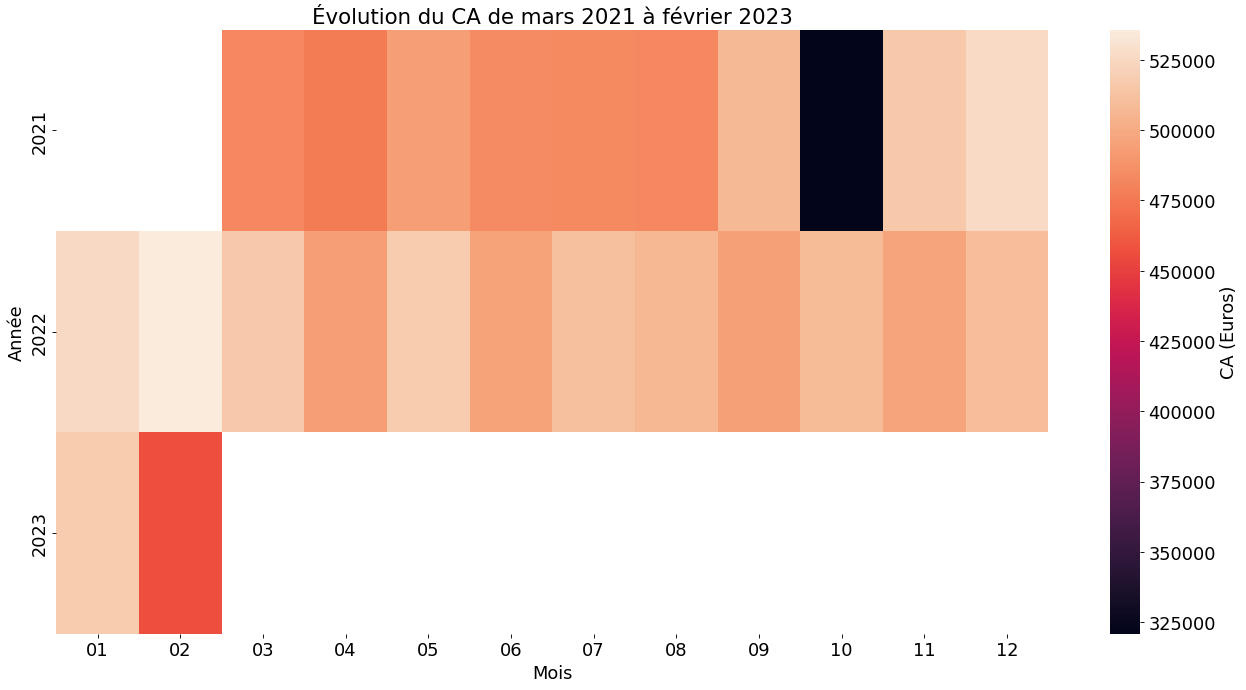

In [66]:
# On crée la colonne "Year" et "Month"
df["Year"]= df['date'].dt.strftime('%Y') # objet!
df["Month"]= df['date'].dt.strftime('%m') # objet!

# Nombre de vente pour chaque mois.
df_heat_map = df[["price","Year", 'Month']].groupby(["Year","Month"]).sum()
df_heat_map 

# Reformatage des données pour le "heatmap"
df_heat_map_year = df_heat_map.reset_index().pivot(index="Year", columns="Month", values="price")
df_heat_map_year

# Création du heatmap
sns.heatmap(df_heat_map_year, cbar_kws={"label": "CA (Euros)"})
plt.title("Évolution du CA de mars 2021 à février 2023")
plt.xlabel("Mois")
plt.ylabel("Année")

plt.show()

In [67]:
# On crée la colonne "Year - Month"
df['yyyy-mm'] = df['date'].dt.strftime('%Y-%m')


CA_par_mois = df.groupby(["yyyy-mm"])[["price"]].sum()
CA_par_mois

# CA au mois d'Octobre 2021.
CA_par_mois.loc[("2021-10"), :][0]

print("CA en octobre 2021:",round(CA_par_mois.loc[("2021-10"), :][0]), "Euros.")
print("CA median:",round(CA_par_mois.median()[0]), "Euros.")

CA en octobre 2021: 320869 Euros.
CA median: 501661 Euros.


In [68]:
CA_median = df.groupby("yyyy-mm")["price"].sum().median()

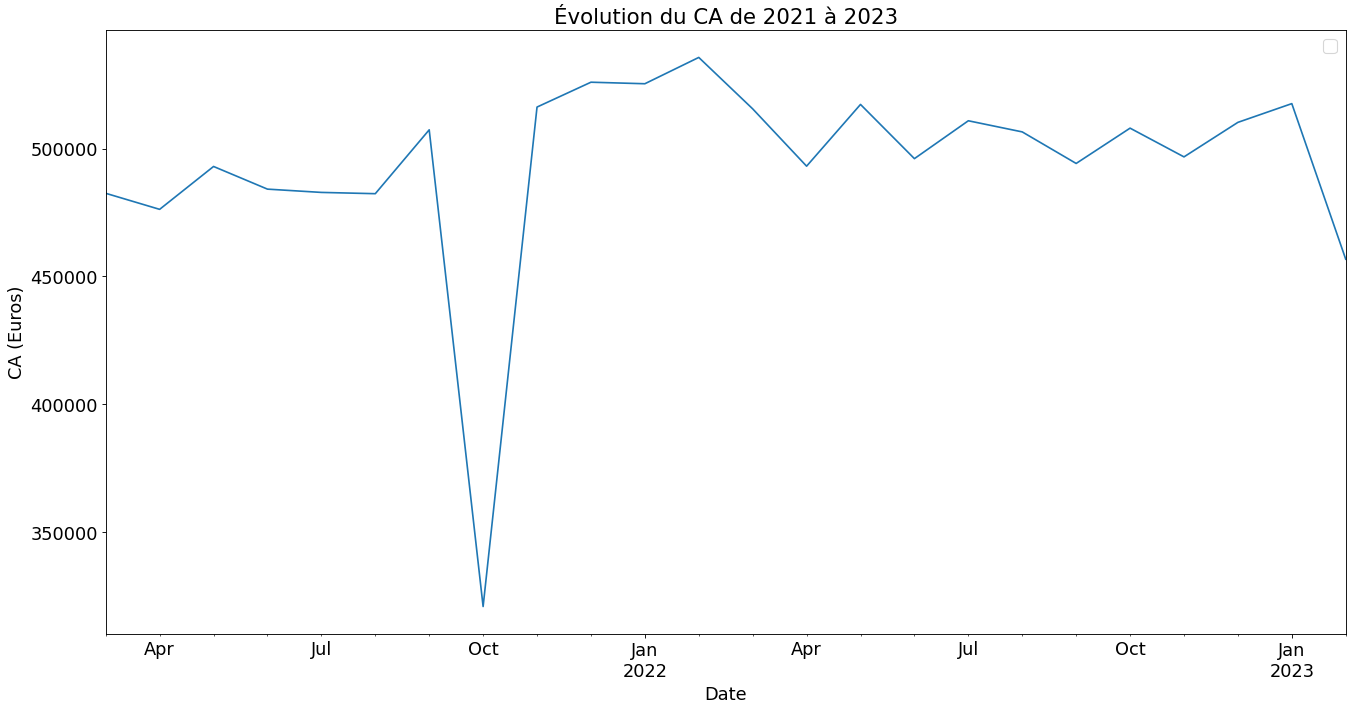

In [69]:
# pd.Grouper, ici nous permet de donner d'affiner les critères pour grouper les lignes!
df.groupby(pd.Grouper(key='date', axis=0, 
                      freq='M'))[['price']].sum().plot( 
ylabel='CA (Euros)', 
xlabel='Date', 
title='Évolution du CA de 2021 à 2023')
plt.legend('')

plt.show()

**Au mois d'Octobre 2021, on note une forte baisse du CA! À quoi cette baisse est dûe? On analyse ce mois avec plus de précisions.** 

In [70]:
df_mois = df[["categ","price","yyyy-mm"]]
df_mois_pivot = pd.pivot_table(df_mois, index=["yyyy-mm"], columns=["categ"], aggfunc=["sum","count"])
df_mois_pivot                              

sum                      count             
            price                      price             
categ           0         1         2      0      1     2
yyyy-mm                                                  
2021-03 193719.08 186974.17 101837.27  18140   9134  1336
2021-04 205362.32 156138.35 114748.49  19356   7579  1522
2021-05 196266.64 165893.40 130863.35  18509   8107  1677
2021-06 168013.08 189162.04 126983.37  15905   9264  1688
2021-07 144790.75 188523.27 149561.34  13582   9169  1991
...           ...       ...       ...    ...    ...   ...
2022-10 187529.07 199609.66 120878.94  17674   9726  1574
2022-11 184704.24 200427.99 111642.60  17320   9798  1456
2022-12 180530.64 205945.71 123803.09  16941  10063  1621
2023-01 181352.99 210104.41 126153.08  17075  10252  1618
2023-02 162526.93 180347.24 113875.52  15262   8789  1501

[24 rows x 6 columns]

In [71]:
# On renomme les colonnes de la table.
df_mois_pivot.columns = ["CA_categ_0","CA_categ_1","CA_categ_2", "nbr_vente_categ_0", "nbr_vente_categ_1","nbr_vente_categ_2"]
df_mois_pivot

,CA_categ_0,CA_categ_1,CA_categ_2,nbr_vente_categ_0,nbr_vente_categ_1,nbr_vente_categ_2
yyyy-mm,,,,,,
2021-03,193719.08,186974.17,101837.27,18140,9134,1336
2021-04,205362.32,156138.35,114748.49,19356,7579,1522
2021-05,196266.64,165893.40,130863.35,18509,8107,1677
2021-06,168013.08,189162.04,126983.37,15905,9264,1688
2021-07,144790.75,188523.27,149561.34,13582,9169,1991
...,...,...,...,...,...,...
2022-10,187529.07,199609.66,120878.94,17674,9726,1574
2022-11,184704.24,200427.99,111642.60,17320,9798,1456
2022-12,180530.64,205945.71,123803.09,16941,10063,1621


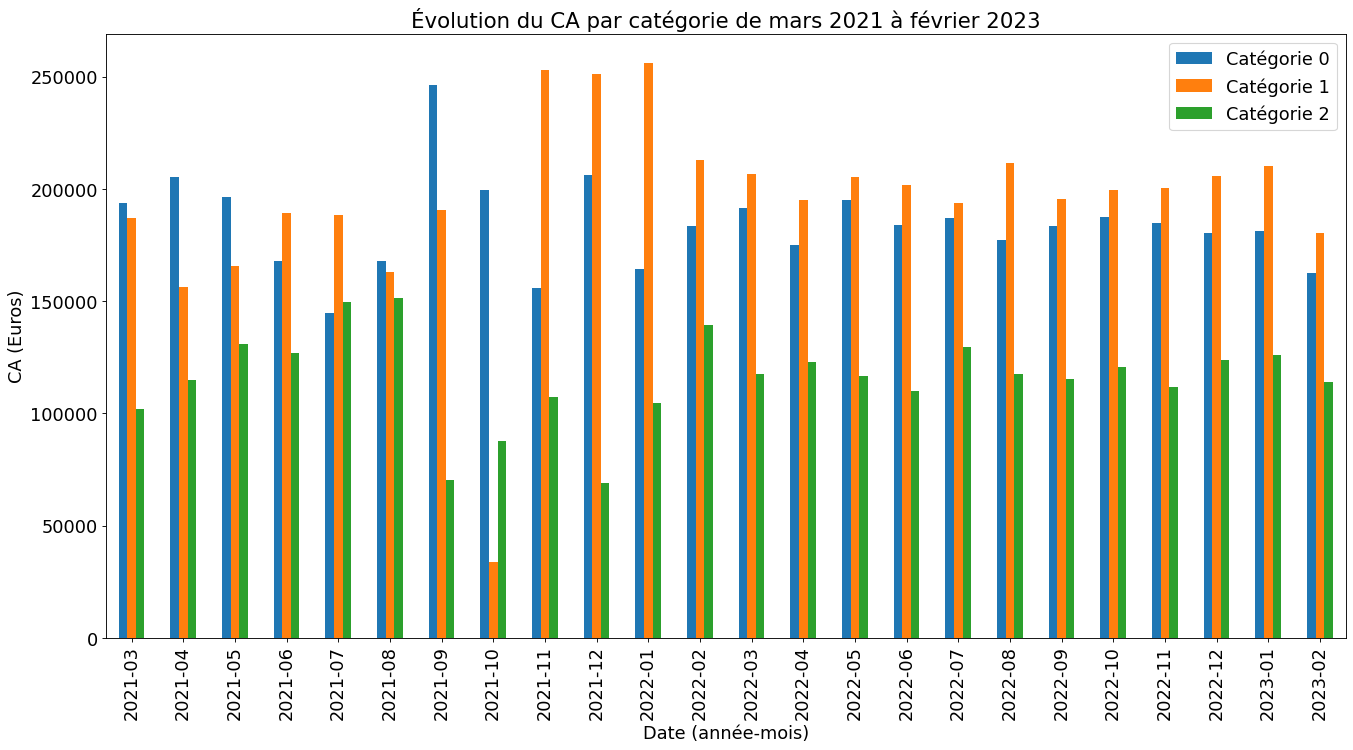

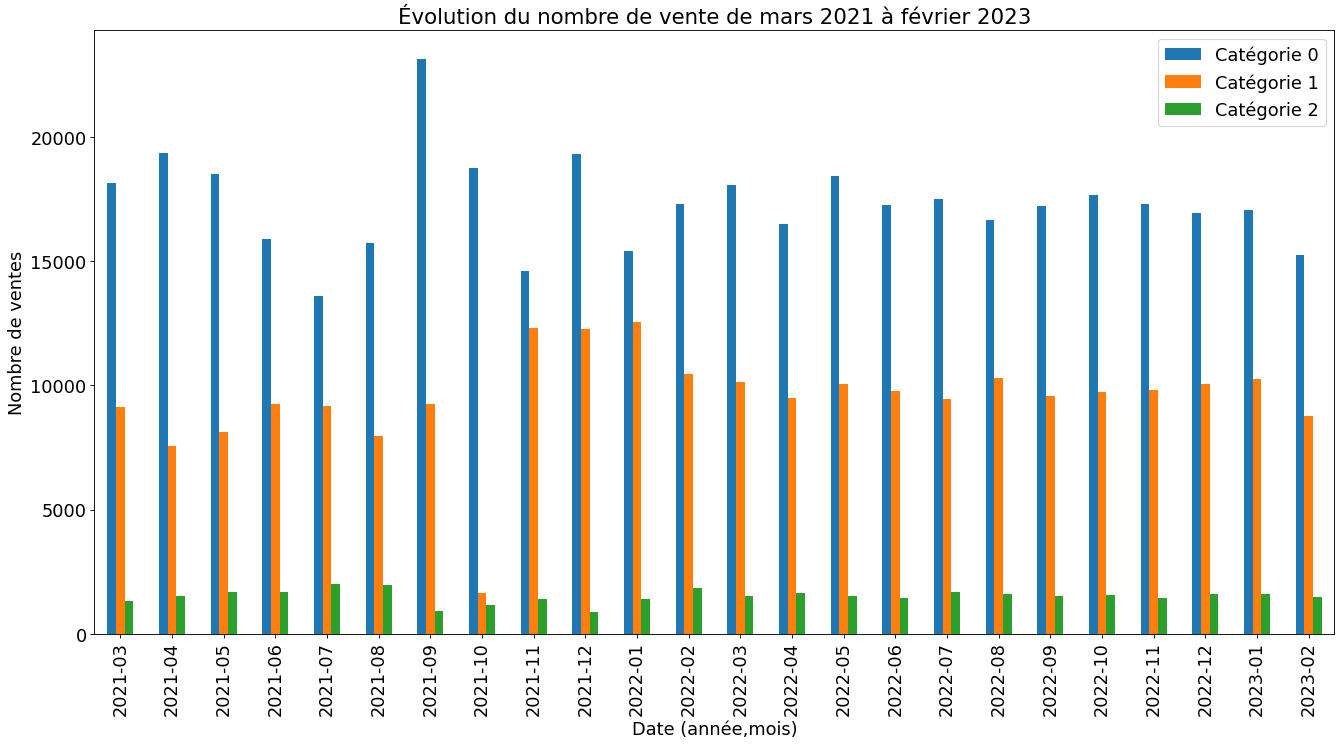

In [72]:
# Toutes les lignes, les trois premières colonnes uniquement:
df_mois_pivot.iloc[:,:3].plot.bar()
plt.legend(["Catégorie 0", "Catégorie 1", "Catégorie 2"])
plt.title("Évolution du CA par catégorie de mars 2021 à février 2023")
plt.xlabel("Date (année-mois)")
plt.ylabel("CA (Euros)")


# Toutes les lignes, les trois dernières  colonnes uniquement:
df_mois_pivot.iloc[:,3:].plot.bar()
plt.legend(["Catégorie 0", "Catégorie 1", "Catégorie 2"])
plt.title("Évolution du nombre de vente de mars 2021 à février 2023")
plt.xlabel("Date (année,mois)")
plt.ylabel("Nombre de ventes")

plt.show()

**On remarque qu'en Octobre 2021, le nombre de vente pour les produits de la catégorie 1 sont très faibles par rapport aux autres mois.** 

In [73]:
# Nombre de vente au mois d'Octobre 2021 pour les produit de la catégorie 1.
print("Nombre de ventes:", df_mois_pivot.loc[("2021-10"), 'nbr_vente_categ_1'])

Nombre de ventes: 1666


In [74]:
df

,id_prod,price,categ,date,id_session,id_client,sex,birth,Year,Month,yyyy-mm
633192,0_1259,11.99,0,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,2021,03,2021-03
273771,0_1390,19.37,0,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,2021,03,2021-03
55629,0_1352,4.50,0,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,2021,03,2021-03
209962,0_1458,6.55,0,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,2021,03,2021-03
293192,0_1358,16.49,0,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,2021,03,2021-03
...,...,...,...,...,...,...,...,...,...,...,...
181209,1_508,21.92,1,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,2023,02,2023-02
269714,2_37,48.99,2,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,2023,02,2023-02
533169,1_695,26.99,1,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,2023,02,2023-02
254099,0_1547,8.99,0,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,2023,02,2023-02


In [75]:
# Nombre de ventes pas jour au mois d'Octobre 2021
df["Day"]= df['date'].dt.strftime('%d')
df_jour = df[["categ","price","Year","Month","Day"]]
df_jour
df_jour_pivot = pd.pivot_table(df_jour, 
                               index=["Year","Month","Day"], 
                               columns = ["categ"], 
                               aggfunc=['sum','count']) 
df_jour_pivot


# On renomme les colonnes
df_jour_pivot.columns = ["CA_categ_0","CA_categ_1","CA_categ_2", "nbr_vente_categ_0", "nbr_vente_categ_1","nbr_vente_categ_2" ]
df_jour_pivot

CA_categ_0  CA_categ_1  CA_categ_2  nbr_vente_categ_0  \
Year Month Day                                                          
2021 03    01      6272.64     6811.53     3491.04             582.00   
           02      6728.26     5627.15     3141.03             621.00   
           03      6121.03     5691.41     3386.25             591.00   
           04      5891.48     6098.98     3205.61             563.00   
           05      5975.97     7071.21     4424.19             561.00   
...                    ...         ...         ...                ...   
2023 02    24      6197.92     5471.07     3538.90             576.00   
           25      4942.69     8050.61     2767.95             458.00   
           26      5522.90     7009.09     3772.73             508.00   
           27      7437.43     6461.76     5271.62             703.00   
           28      4901.86     9226.25     3977.04             472.00   

                nbr_vente_categ_1  nbr_vente_categ_2  
Year Month Day                                        
2021 03    01              335.00              46.00  
           02              276.00              43.00  
           03              280.00              40.00  
           04              297.00              43.00  
           05              331.00              51.00  
...                           ...                ...  
2023 02    24              271.00              47.00  
           25              401.00              46.00  
           26              329.00              53.00  
           27              332.00              75.00  
           28              439.00              50.00  

[730 rows x 6 columns]

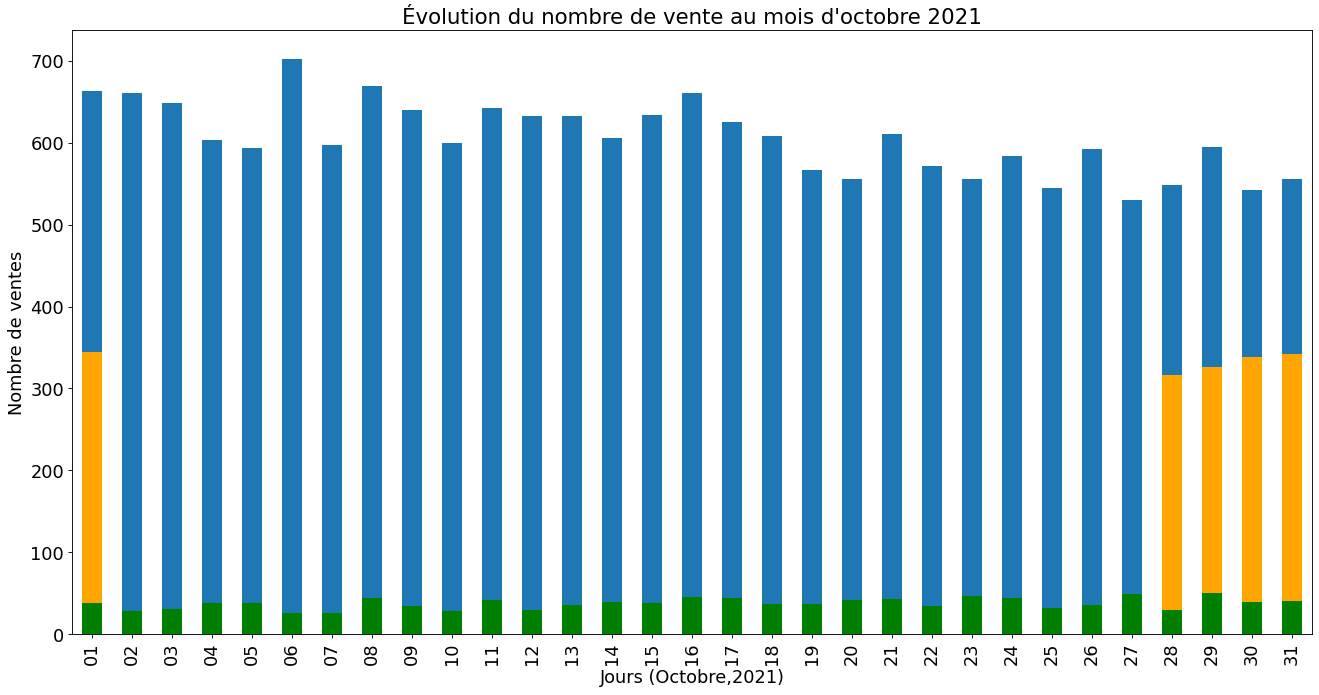

In [76]:
# Nombre de vente PAR JOUR au mois d'Octobre 2021 pour les produit de la catégorie 0,1 et 2.
df_jour_pivot.loc[("2021","10"), 'nbr_vente_categ_0'].plot.bar()
df_jour_pivot.loc[("2021","10"), 'nbr_vente_categ_1'].plot.bar(color= 'orange')
df_jour_pivot.loc[("2021","10"), 'nbr_vente_categ_2'].plot.bar(color= 'green')

plt.title("Évolution du nombre de vente au mois d'octobre 2021")
plt.xlabel("Jours (Octobre,2021)")
plt.ylabel("Nombre de ventes")


plt.show()

**Au mois d'Octobre, un problème d'enregistrement des ventes associés aux produits de la catégorie 1 est identifié. 
Le nombre de données manquantes n'est pas négligeable,ces données ne peuvent pas être remplacées. Entres autres l'id_prod, l'id_client et l'id_transactions ne sont pas disponibles.**


**Pour les autres mois les données concernant les ventes sont complètes. Pour des soucis d'homogénéité, nous supprimons tous les chiffres relatifs au mois d'Octobre.**

In [77]:
a_suppr = df[df["yyyy-mm"]== "2021-10"]
a_suppr

,id_prod,price,categ,date,id_session,id_client,sex,birth,Year,Month,yyyy-mm,Day
239675,0_1145,6.99,0,2021-10-01 00:00:23.722317,s_98170,c_5907,f,1991,2021,10,2021-10,01
676045,1_622,17.41,1,2021-10-01 00:03:07.095422,s_98169,c_7614,m,1995,2021,10,2021-10,01
53715,1_202,19.96,1,2021-10-01 00:03:16.664480,s_98171,c_4492,f,1980,2021,10,2021-10,01
312984,0_2268,17.57,0,2021-10-01 00:06:04.960675,s_98172,c_2588,m,1989,2021,10,2021-10,01
1724,0_1421,19.99,0,2021-10-01 00:07:50.987959,s_98173,c_5953,m,1986,2021,10,2021-10,01
...,...,...,...,...,...,...,...,...,...,...,...,...
581521,0_1108,17.45,0,2021-10-31 23:42:55.889671,s_112940,c_6259,m,1991,2021,10,2021-10,31
21585,1_414,23.83,1,2021-10-31 23:48:14.590919,s_112948,c_1609,m,1980,2021,10,2021-10,31
509755,0_1425,12.99,0,2021-10-31 23:51:26.167675,s_112949,c_1767,f,1983,2021,10,2021-10,31
497301,0_1745,4.99,0,2021-10-31 23:55:21.654841,s_112950,c_3320,m,1976,2021,10,2021-10,31


In [78]:
nbr_lignes_avt_suppr = len(df)
nbr_lignes_avt_suppr

679332

In [79]:
df.drop(a_suppr.index, inplace=True)
df

,id_prod,price,categ,date,id_session,id_client,sex,birth,Year,Month,yyyy-mm,Day
633192,0_1259,11.99,0,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,2021,03,2021-03,01
273771,0_1390,19.37,0,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,2021,03,2021-03,01
55629,0_1352,4.50,0,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,2021,03,2021-03,01
209962,0_1458,6.55,0,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,2021,03,2021-03,01
293192,0_1358,16.49,0,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,2021,03,2021-03,01
...,...,...,...,...,...,...,...,...,...,...,...,...
181209,1_508,21.92,1,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,2023,02,2023-02,28
269714,2_37,48.99,2,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,2023,02,2023-02,28
533169,1_695,26.99,1,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,2023,02,2023-02,28
254099,0_1547,8.99,0,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,2023,02,2023-02,28


In [80]:
print("Pourcentage de données supprimées:", 
      round((nbr_lignes_avt_suppr - len(df))/ nbr_lignes_avt_suppr *100,2), "%")

Pourcentage de données supprimées: 3.18 %


In [81]:
df["id_client"].isna().sum() # 0
df["id_session"].isna().sum() # 0
df["id_prod"].isna().sum() # 0

0

In [82]:
CA_total = df["price"].sum()

print("CA total:", round(CA_total),"Euros.")
print("Nombre total de ventes:", round(df["id_session"].count()),".")

CA total: 11535068 Euros.
Nombre total de ventes: 657726 .


In [83]:
df.dtypes

id_prod               object
price                float64
categ                  int64
date          datetime64[ns]
id_session            object
id_client             object
sex                   object
birth                  int64
Year                  object
Month                 object
yyyy-mm               object
Day                   object
dtype: object

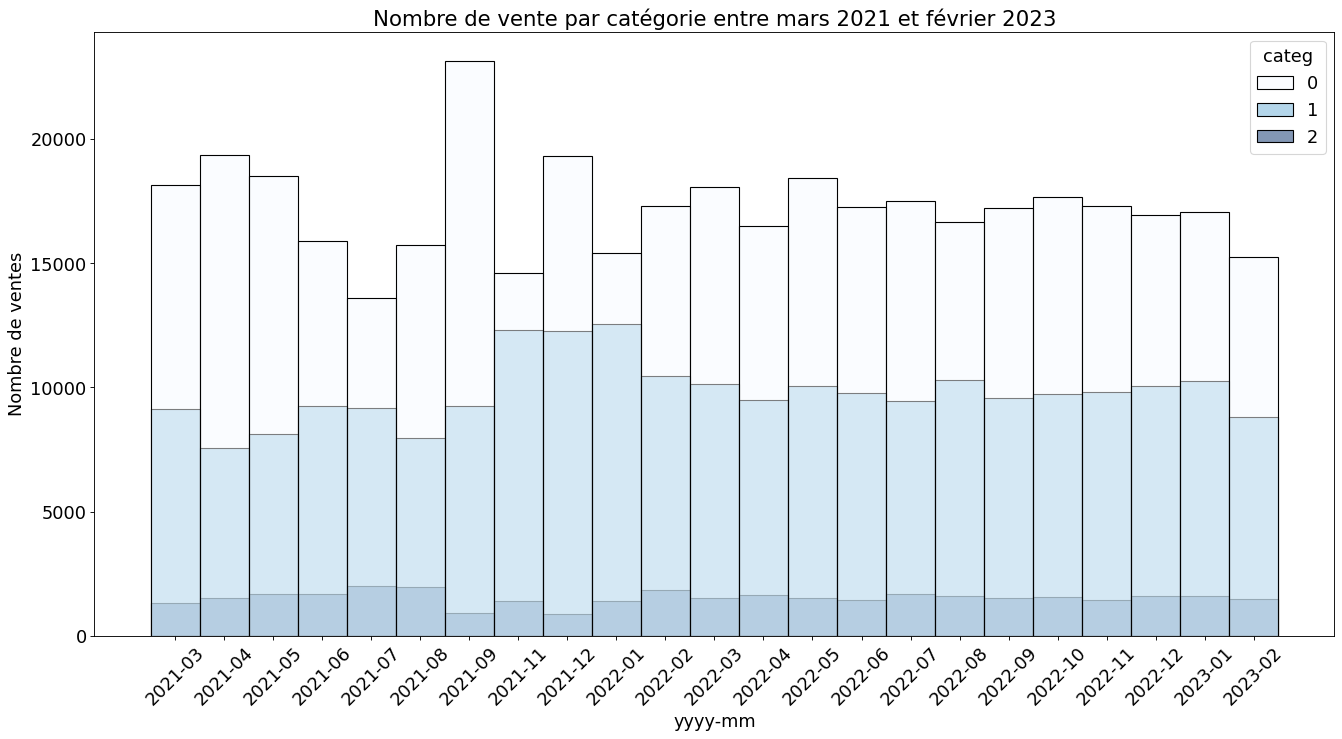

In [84]:
sns.histplot(data=df, x='yyyy-mm', hue='categ',palette="Blues")
plt.xticks(rotation=45)
plt.ylabel("Nombre de ventes")
plt.title('Nombre de vente par catégorie entre mars 2021 et février 2023')
plt.show()

In [85]:
df

,id_prod,price,categ,date,id_session,id_client,sex,birth,Year,Month,yyyy-mm,Day
633192,0_1259,11.99,0,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,2021,03,2021-03,01
273771,0_1390,19.37,0,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,2021,03,2021-03,01
55629,0_1352,4.50,0,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,2021,03,2021-03,01
209962,0_1458,6.55,0,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,2021,03,2021-03,01
293192,0_1358,16.49,0,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,2021,03,2021-03,01
...,...,...,...,...,...,...,...,...,...,...,...,...
181209,1_508,21.92,1,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,2023,02,2023-02,28
269714,2_37,48.99,2,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,2023,02,2023-02,28
533169,1_695,26.99,1,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,2023,02,2023-02,28
254099,0_1547,8.99,0,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,2023,02,2023-02,28


In [86]:
df_date = df.groupby("yyyy-mm")[["price"]].sum()
df_date

,price
yyyy-mm,
2021-03,482530.52
2021-04,476249.16
2021-05,493023.39
2021-06,484158.49
2021-07,482875.36
...,...
2022-10,508017.67
2022-11,496774.83
2022-12,510279.44


**Est-ce un modèle additif?**

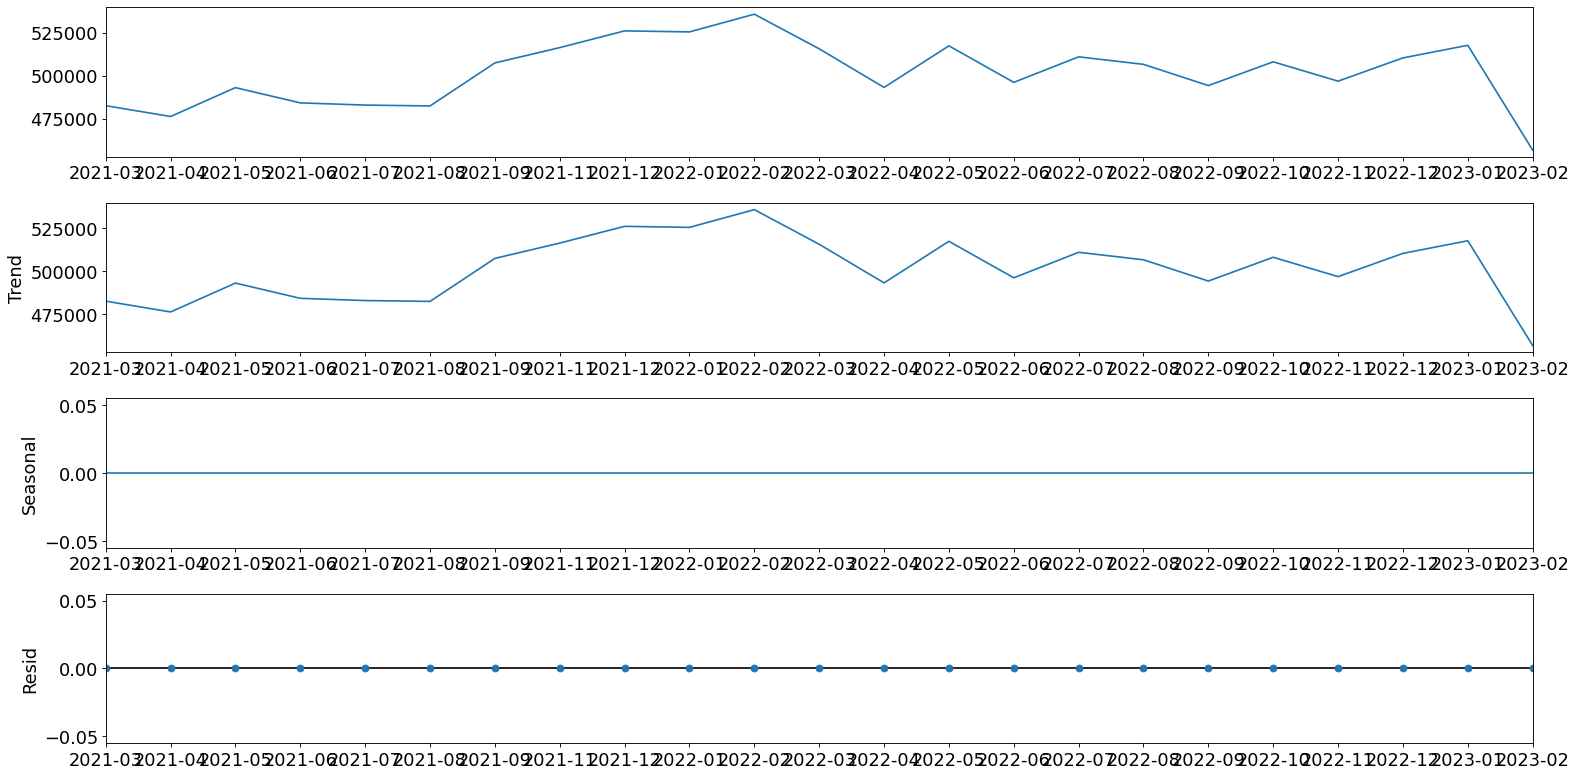

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

TSA = seasonal_decompose(df_date, period=1).plot() #period=?? 
#TSA = seasonal_decompose(df_date, period =1, model= "multiplicative").plot()

**La variance pour les résidus est nulle et surtout elle est constante pour: "period=1".Le modèle additif ainsi défini est suffisant.**

**Il n'y a pas de saisonnalité**

**Il n'y a pas de tendance particulière. Le CA stagne sur le 12 derniers mois après une légère augmentation. Seulement, on note une diminution du CA en février 2023. Phénomène à suivre!**

**Nous mettons en place la moyenne mobile pour faire apparaître la tendance globale de la série temporelle.**

In [88]:
df_date

,price
yyyy-mm,
2021-03,482530.52
2021-04,476249.16
2021-05,493023.39
2021-06,484158.49
2021-07,482875.36
...,...
2022-10,508017.67
2022-11,496774.83
2022-12,510279.44


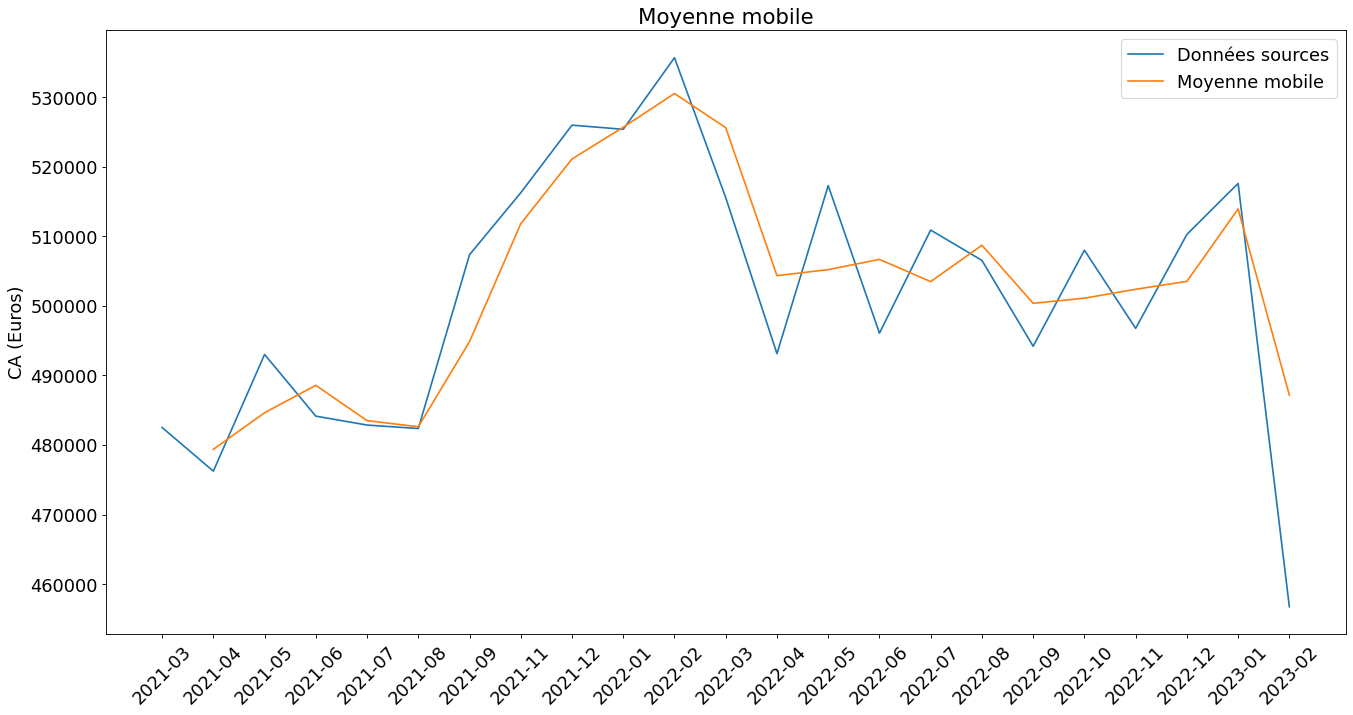

In [89]:
def plot_moyenne_mobile(timeseries):
    
# 1er_étape: Je détermine la moyenne mobile.
    moy_mobile = timeseries.rolling(window=2).mean() 
 
# 2ème_étape J'affiche la série temporelle avec la moyenne mobile
    source = plt.plot(timeseries, label= "Données sources")
    mean = plt.plot(moy_mobile, label= "Moyenne mobile")
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    plt.ylabel("CA (Euros)")
    plt.title("Moyenne mobile")
    plt.show()
    

plot_moyenne_mobile(df_date)    
    

**Étudier le CA entre un jour J et un jour J-1, nous permet d'établir si il y a une relation ou non entre les achats effectués ou ils sont tout simplement dû au hasard.**

In [90]:
df

,id_prod,price,categ,date,id_session,id_client,sex,birth,Year,Month,yyyy-mm,Day
633192,0_1259,11.99,0,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,2021,03,2021-03,01
273771,0_1390,19.37,0,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,2021,03,2021-03,01
55629,0_1352,4.50,0,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,2021,03,2021-03,01
209962,0_1458,6.55,0,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,2021,03,2021-03,01
293192,0_1358,16.49,0,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,2021,03,2021-03,01
...,...,...,...,...,...,...,...,...,...,...,...,...
181209,1_508,21.92,1,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,2023,02,2023-02,28
269714,2_37,48.99,2,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,2023,02,2023-02,28
533169,1_695,26.99,1,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,2023,02,2023-02,28
254099,0_1547,8.99,0,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,2023,02,2023-02,28


In [91]:
lag = df.groupby(["categ","Year","Month","Day"])[["price"]].sum() # lag: tous les jours
lag = lag.reset_index()
lag
#lag_short = lag.loc[lag["yyyy-mm"] > "2021-10"]
#lag_short 

,categ,Year,Month,Day,price
0,0,2021,03,01,6272.64
1,0,2021,03,02,6728.26
2,0,2021,03,03,6121.03
3,0,2021,03,04,5891.48
4,0,2021,03,05,5975.97
...,...,...,...,...,...
2092,2,2023,02,24,3538.90
2093,2,2023,02,25,2767.95
2094,2,2023,02,26,3772.73
2095,2,2023,02,27,5271.62


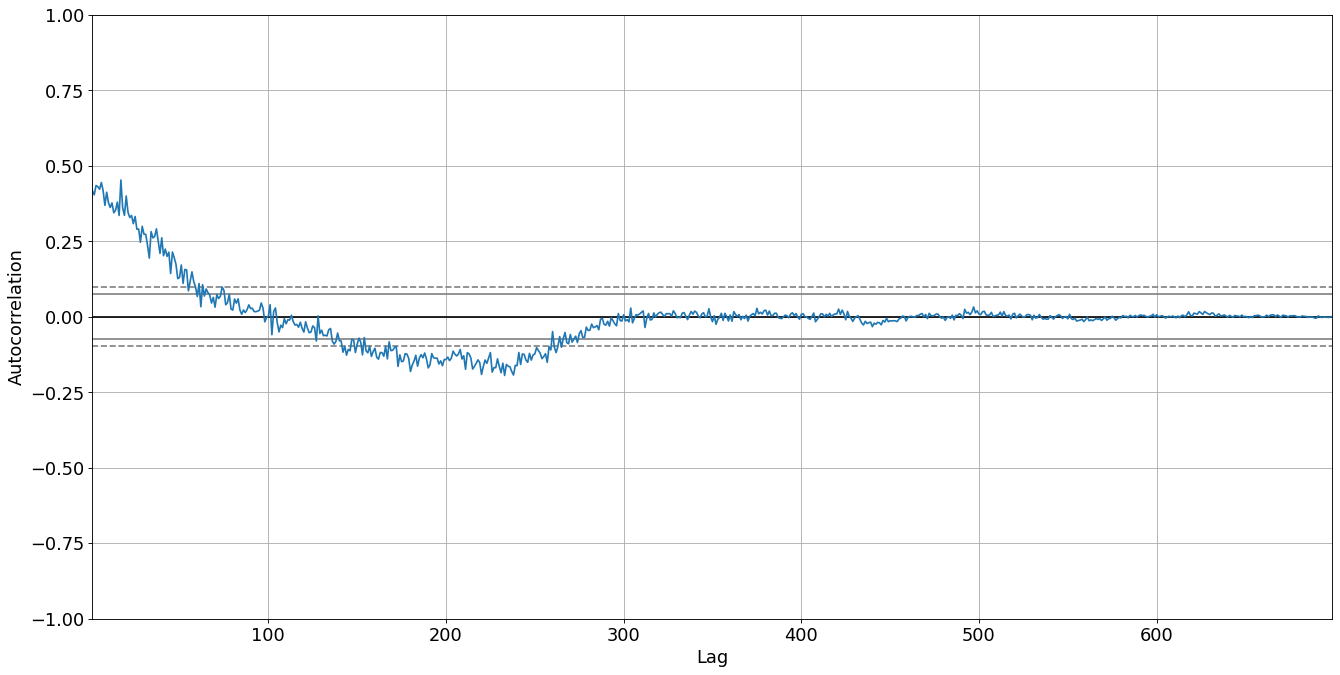

In [92]:
lag = df.groupby(["categ","Year","Month", "Day"])[["price"]].sum() # lag: tous les mois
lag = lag.reset_index()

#lag_short = lag_short.groupby(["categ","yyyy-mm"])[["price"]].sum() # lag: tous les mois
#lag_short = lag.reset_index()


# import autocorrelation function
from pandas.plotting import autocorrelation_plot

# autocorrelation plot
autocorrelation_plot(lag.loc[lag["categ"]== 1, "price"])
plt.show()

**La saisonnalité, n'est également pas perceptible ici. Il n'y pas d'oscillation à proprement parler entre les valeurs positives et négatives de l'autocorrélation.
L'autocorrélation diminue avec le temps, plus les achats sont éloignés dans le temps, moins ils sont associés entre eux.**

## 4.2. Le CA par catégorie

In [93]:
CA_et_nbr_prod_par_categ = df.groupby("categ").agg(CA_en_millions_Euros = ("price", np.sum), nbr_produits = ("price",np.size)) 
CA_et_nbr_prod_par_categ.iloc[:,0] = round(CA_et_nbr_prod_par_categ.iloc[:,0]/1E6,2)
CA_et_nbr_prod_par_categ

,CA_en_millions_Euros,nbr_produits
categ,,
0,4.22,396911
1,4.62,225503
2,2.69,35312


In [94]:
tab_CA_total = pd.crosstab(index = CA_et_nbr_prod_par_categ.index,
           columns = CA_et_nbr_prod_par_categ["CA_en_millions_Euros"].sum(),
           values = CA_et_nbr_prod_par_categ["CA_en_millions_Euros"],
           aggfunc = 'sum', 
           #normalize = "all",
           margins = False,
           colnames = ["CA total (en millions d'Euros)"],
           rownames = ["Catégorie"])

tab_CA_total

CA total (en millions d'Euros),11.53
Catégorie,
0,4.22
1,4.62
2,2.69


In [95]:
tab_nbr_prod = pd.crosstab(index = CA_et_nbr_prod_par_categ.index,
           columns = CA_et_nbr_prod_par_categ["nbr_produits"].sum(),
           values = CA_et_nbr_prod_par_categ["nbr_produits"],
           aggfunc = 'sum', 
           #normalize = "all",
           margins = False,
           colnames = ["nbr_produits"],
           rownames = ["Catégorie"])

tab_nbr_prod 

nbr_produits,657726
Catégorie,
0,396911
1,225503
2,35312


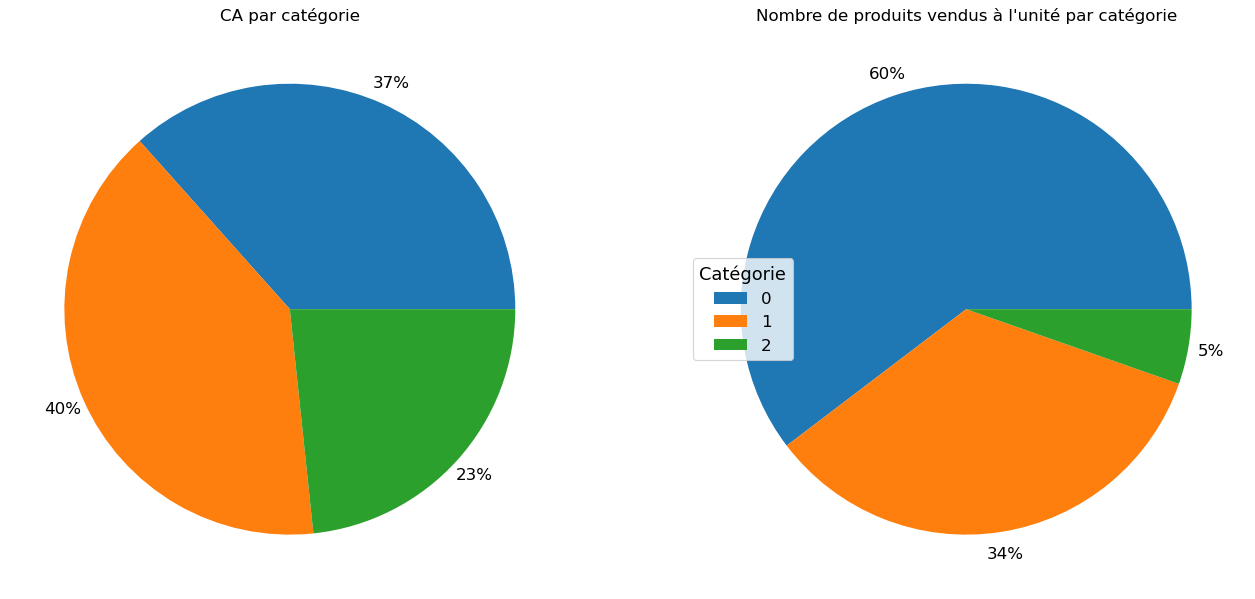

CA total (en millions d'Euros),11.53
Catégorie,
0,4.22
1,4.62
2,2.69


nbr_produits,657726
Catégorie,
0,396911
1,225503
2,35312


In [96]:
# Source: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html

fig, axes = plt.subplots(1, 2, figsize=(20, 15))

# Données sources
data = CA_et_nbr_prod_par_categ['CA_en_millions_Euros']
tranche = CA_et_nbr_prod_par_categ['CA_en_millions_Euros'].index

# On mets en forme le camembert.
axes[0].pie(data,autopct="%1.f%%", pctdistance= 1.1, textprops={'fontsize': 15}) 

# Légende
#axes[0].legend(tranche,
          #loc="lower right",
          #bbox_to_anchor=(-.5,0,0.5,1))

# Titre
axes[0].set_title("CA par catégorie", size =15)



#-------------------------------


# Données sources
data = CA_et_nbr_prod_par_categ['nbr_produits']
tranche = CA_et_nbr_prod_par_categ['nbr_produits'].index

# On mets en forme le camembert.
axes[1].pie(data,autopct="%1.f%%", pctdistance= 1.1, textprops={'fontsize': 15}) 


# Titre


# Légende
axes[1].legend(tranche,title= "Catégorie",
          loc="center left",
          prop={'size': 15})#,
          #bbox_to_anchor=(-.5,0,0.5,1))

# Titre
axes[1].set_title("Nombre de produits vendus à l'unité par catégorie", size =15)


plt.show()

display(tab_CA_total)
display(tab_nbr_prod)

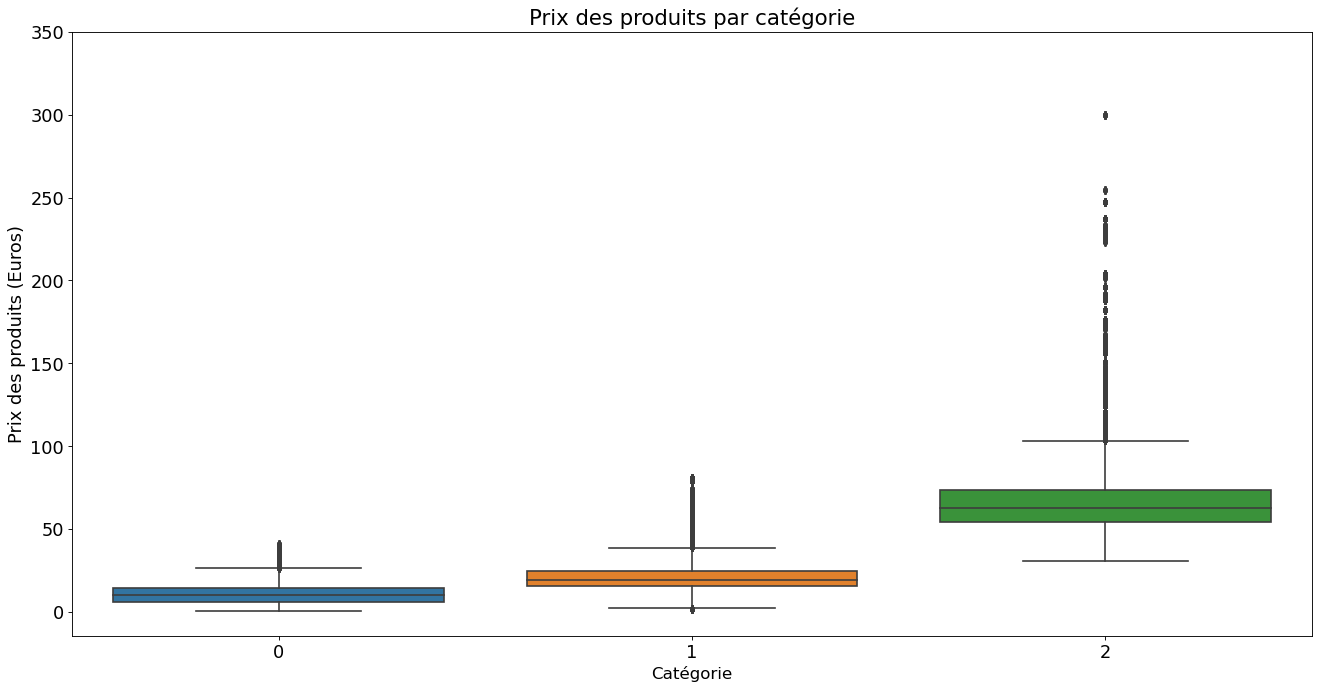

In [97]:
#Boxplot price par catégorie

fig, ax = plt.subplots()

sns.boxplot(x= 'categ', y= "price", 
            data= df).set(xlabel= '', ylabel= 'Prix des produits (Euros)')

# Graduation de l'axe y.
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(0, 400, 50))
# Graduation de l'axe x.
ax.set_xlabel("Catégorie", size =15)

plt.title("Prix des produits par catégorie")

plt.show() 

In [98]:
df.groupby("categ")[["price"]].describe().T

categ               0         1        2
price count 396911.00 225503.00 35312.00
      mean      10.64     20.49    76.25
      std        4.93      7.59    39.81
      min        0.62      2.00    30.99
      25%        6.29     15.81    53.99
      50%        9.99     19.08    62.83
      75%       14.45     24.98    73.72
      max       40.99     80.99   300.00

## 4.3 Produits les plus achetés (en général et par catégorie)

In [99]:
prod_plus_ach = df["id_prod"].value_counts()
type(prod_plus_ach) # Series

df_prod_plus_ach = pd.DataFrame(prod_plus_ach)
df_prod_plus_ach

,id_prod
1_369,2237
1_417,2173
1_414,2166
1_498,2117
1_425,2084
...,...
0_549,1
0_807,1
0_1151,1
2_23,1


In [100]:
df[df["id_prod"] == "1_369"]

,id_prod,price,categ,date,id_session,id_client,sex,birth,Year,Month,yyyy-mm,Day
412053,1_369,23.99,1,2021-03-01 18:43:28.107416,s_376,c_8303,m,1990,2021,03,2021-03,01
280417,1_369,23.99,1,2021-03-01 20:17:38.089146,s_421,c_7621,m,1957,2021,03,2021-03,01
543522,1_369,23.99,1,2021-03-02 22:53:35.443573,s_934,c_4685,f,1962,2021,03,2021-03,02
518329,1_369,23.99,1,2021-03-03 03:09:52.599803,s_1012,c_6555,m,1994,2021,03,2021-03,03
203074,1_369,23.99,1,2021-03-03 09:59:16.013112,s_1131,c_3035,m,1964,2021,03,2021-03,03
...,...,...,...,...,...,...,...,...,...,...,...,...
323314,1_369,23.99,1,2023-02-27 13:04:59.683526,s_347724,c_5076,m,1960,2023,02,2023-02,27
532193,1_369,23.99,1,2023-02-27 14:30:12.531847,s_347761,c_6267,f,1995,2023,02,2023-02,27
320444,1_369,23.99,1,2023-02-27 16:33:24.649794,s_347807,c_1463,f,1962,2023,02,2023-02,27
663008,1_369,23.99,1,2023-02-28 03:41:13.227719,s_348035,c_1642,m,1996,2023,02,2023-02,28


In [101]:
df_prod_plus_ach = df_prod_plus_ach.reset_index()
df_prod_plus_ach

,index,id_prod
0,1_369,2237
1,1_417,2173
2,1_414,2166
3,1_498,2117
4,1_425,2084
...,...,...
3259,0_549,1
3260,0_807,1
3261,0_1151,1
3262,2_23,1


In [102]:
df_prod_plus_ach["index"].isin(df["id_prod"])== True
df_prod_plus_ach = df_prod_plus_ach[df_prod_plus_ach["index"].isin(df["id_prod"])== True]
df_prod_plus_ach

,index,id_prod
0,1_369,2237
1,1_417,2173
2,1_414,2166
3,1_498,2117
4,1_425,2084
...,...,...
3259,0_549,1
3260,0_807,1
3261,0_1151,1
3262,2_23,1


In [103]:
df_prod_plus_ach = df_prod_plus_ach.rename(columns = {"id_prod":"nbr_vente"})
df_prod_plus_ach = df_prod_plus_ach.rename(columns = {"index":"id_prod"})
df_prod_plus_ach

,id_prod,nbr_vente
0,1_369,2237
1,1_417,2173
2,1_414,2166
3,1_498,2117
4,1_425,2084
...,...,...
3259,0_549,1
3260,0_807,1
3261,0_1151,1
3262,2_23,1


In [104]:
df_prod_plus_ach.isna().sum()

id_prod      0
nbr_vente    0
dtype: int64

In [105]:
# Je recupère d'autres informations relative à l'id_produit
nbr_prod_plus_ach = pd.merge(df_prod_plus_ach, df_products, on="id_prod", how="left")
nbr_prod_plus_ach.isna().sum()
nbr_prod_plus_ach.isna().any()
nbr_prod_plus_ach[nbr_prod_plus_ach["price"].isna()]

,id_prod,nbr_vente,price,categ


In [106]:
nbr_prod_plus_ach

,id_prod,nbr_vente,price,categ
0,1_369,2237,23.99,1
1,1_417,2173,20.99,1
2,1_414,2166,23.83,1
3,1_498,2117,23.37,1
4,1_425,2084,16.99,1
...,...,...,...,...
3259,0_549,1,2.99,0
3260,0_807,1,1.99,0
3261,0_1151,1,2.99,0
3262,2_23,1,115.99,2


In [107]:
#nbr_prod_plus_ach = nbr_prod_plus_ach.set_index("id_prod")
#nbr_prod_plus_ach

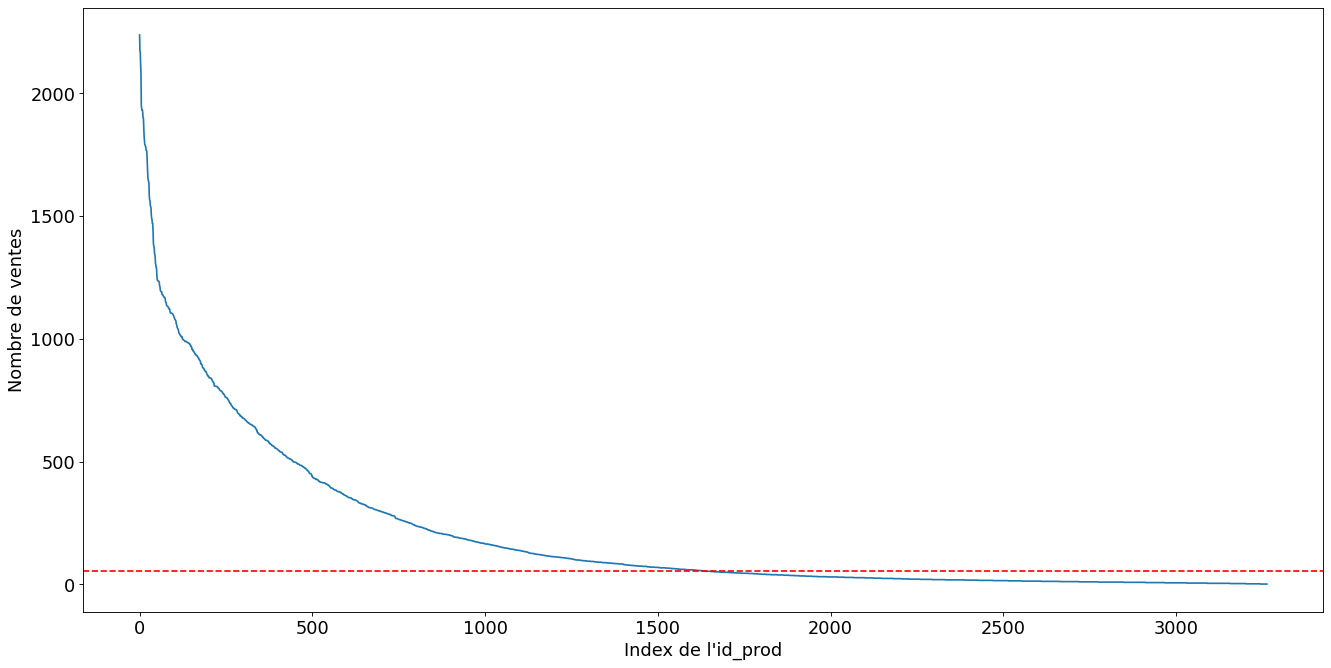

In [108]:
fig, ax = plt.subplots()
plt.plot(nbr_prod_plus_ach.nbr_vente)
plt.ylabel("Nombre de ventes")
plt.xlabel("Index de l'id_prod")
ax.axhline(y = nbr_prod_plus_ach["nbr_vente"].median(), linestyle='dashed', color= 'red')

plt.show()

In [109]:
nbr_prod_plus_ach["nbr_vente"].median()

55.0

In [110]:
nbr_prod_plus_ach.nbr_vente

0       2237
1       2173
2       2166
3       2117
4       2084
        ... 
3259       1
3260       1
3261       1
3262       1
3263       1
Name: nbr_vente, Length: 3264, dtype: int64

In [111]:
nbr_prod_plus_ach.groupby("categ")["id_prod"].count()

categ
0    2291
1     737
2     236
Name: id_prod, dtype: int64

In [112]:
nbr_prod_plus_ach['Type']= ''
nbr_prod_plus_ach

,id_prod,nbr_vente,price,categ,Type
0,1_369,2237,23.99,1,
1,1_417,2173,20.99,1,
2,1_414,2166,23.83,1,
3,1_498,2117,23.37,1,
4,1_425,2084,16.99,1,
...,...,...,...,...,...
3259,0_549,1,2.99,0,
3260,0_807,1,1.99,0,
3261,0_1151,1,2.99,0,
3262,2_23,1,115.99,2,


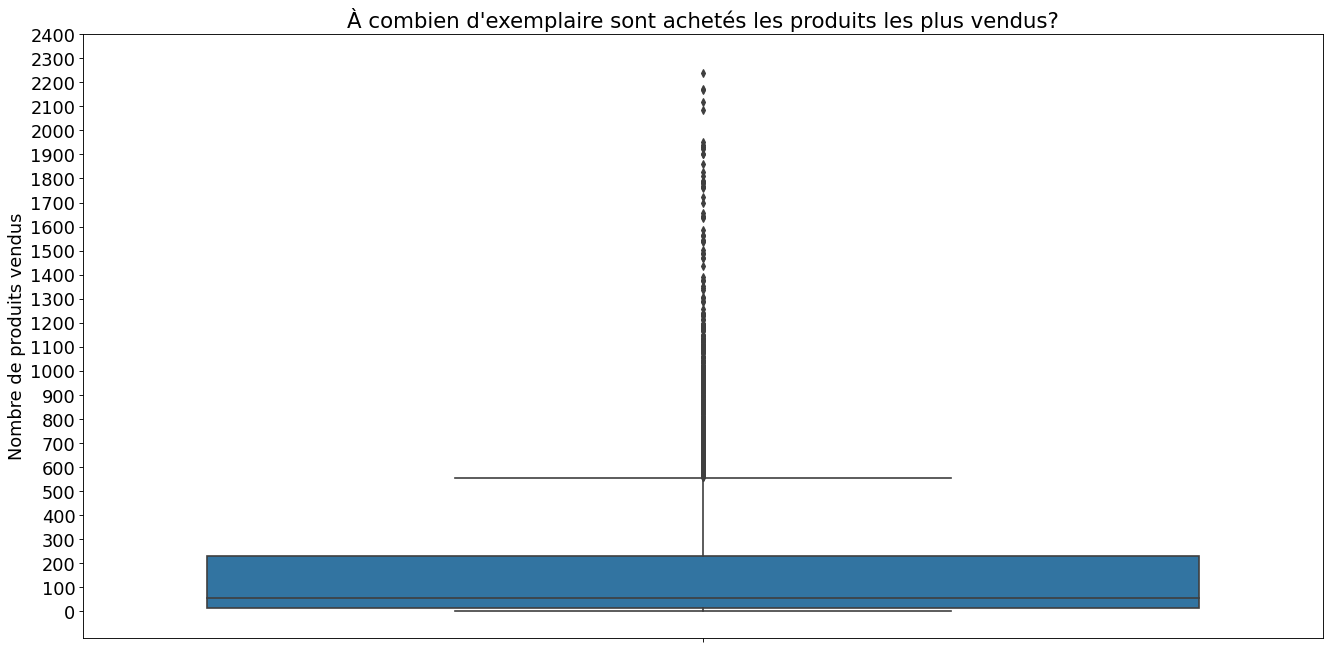

In [113]:
fig, ax = plt.subplots()

nbr_prod_plus_ach['Type']= ''
#sns.boxplot(Test.nbr).set(xlabel="Nbr de produits vendus")

sns.boxplot(x= 'Type', y= "nbr_vente", 
            data= nbr_prod_plus_ach).set(xlabel= '', ylabel= 'Nombre de produits vendus')


# Graduation de l'axe y.
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(0, 2500, 100))

plt.title("À combien d'exemplaire sont achetés les produits les plus vendus?")

plt.show()

In [114]:
# On détermine les quantiles. 
# Nous n'avons pas besoin de ranger les prix dans l'ordre croissant.
Q1 = round(np.percentile(nbr_prod_plus_ach.nbr_vente, 25, interpolation = 'midpoint'))
Q2 = round(np.percentile(nbr_prod_plus_ach.nbr_vente, 50, interpolation = 'midpoint'))
Q3 = round(np.percentile(nbr_prod_plus_ach.nbr_vente, 75, interpolation = 'midpoint'))


IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
up_limit = Q3 + 1.5 * IQR


print('Limite inférieure:', round(low_limit),".") 
print('Limite supérieure:', round(up_limit),".") 

Limite inférieure: -308 .
Limite supérieure: 556 .


**Les produits concernés par un nombre de ventes nettement supérieur à la valeur médiane (les outliers) sont donnés ci-dessous.**

**On peut les considérer comme nos bestsellers, étant donné que le nombre de produits vendus par rapport aux autres produits est atypiques.**

In [115]:
# Nos bestsellers
outlier =[]
for x in nbr_prod_plus_ach.nbr_vente:
	if ((x> up_limit) or (x<low_limit)):
		outlier.append(x)
print('Valeurs aberrantes ou atypiques:', outlier)
print('Nombre de valeurs aberrantes ou atypiques:', len(outlier))


nbr_prod_plus_ach[nbr_prod_plus_ach.nbr_vente > up_limit]

Valeurs aberrantes ou atypiques: [2237, 2173, 2166, 2117, 2084, 1950, 1938, 1931, 1931, 1923, 1901, 1900, 1861, 1828, 1811, 1791, 1789, 1783, 1780, 1767, 1766, 1762, 1724, 1698, 1655, 1645, 1640, 1636, 1584, 1566, 1562, 1543, 1539, 1534, 1503, 1490, 1484, 1469, 1469, 1438, 1390, 1377, 1373, 1352, 1343, 1337, 1307, 1301, 1290, 1288, 1259, 1242, 1237, 1237, 1235, 1234, 1233, 1229, 1215, 1212, 1197, 1194, 1193, 1191, 1191, 1181, 1179, 1178, 1177, 1173, 1170, 1169, 1169, 1168, 1165, 1151, 1149, 1146, 1137, 1134, 1133, 1132, 1131, 1129, 1123, 1123, 1122, 1121, 1112, 1106, 1105, 1104, 1104, 1104, 1103, 1102, 1101, 1097, 1095, 1091, 1088, 1083, 1080, 1077, 1075, 1073, 1061, 1059, 1052, 1045, 1043, 1040, 1037, 1031, 1023, 1021, 1019, 1017, 1013, 1012, 1009, 1009, 1008, 1008, 999, 997, 997, 996, 994, 993, 992, 989, 989, 989, 989, 988, 988, 987, 985, 984, 983, 983, 983, 982, 981, 977, 977, 973, 970, 969, 969, 961, 956, 956, 956, 950, 949, 947, 946, 942, 940, 937, 937, 934, 933, 931, 931, 930, 92

,id_prod,nbr_vente,price,categ,Type
0,1_369,2237,23.99,1,
1,1_417,2173,20.99,1,
2,1_414,2166,23.83,1,
3,1_498,2117,23.37,1,
4,1_425,2084,16.99,1,
...,...,...,...,...,...
387,0_1531,563,6.99,0,
388,0_1525,562,6.99,0,
389,1_643,560,29.99,1,
390,0_1528,560,11.38,0,


In [116]:
bestsellers = nbr_prod_plus_ach[nbr_prod_plus_ach.nbr_vente > up_limit]
pr_camenbert_bs = bestsellers.groupby("categ")[["id_prod"]].count()
pr_camenbert_bs

,id_prod
categ,
0,237
1,134
2,21


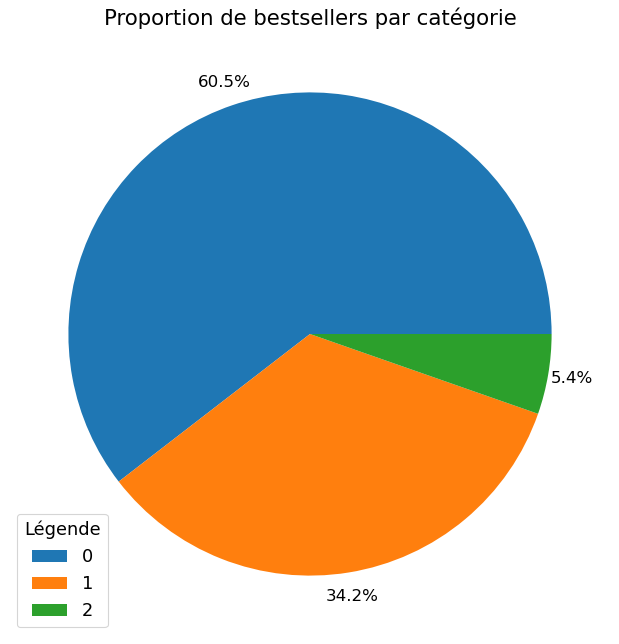

In [117]:
x = pr_camenbert_bs["id_prod"]
plt.pie(x,autopct="%1.1f%%", pctdistance= 1.1, textprops={'fontsize': 15})
#axes.set_title('', size = 15)
plt.legend(pr_camenbert_bs.index, title = "Légende") 
           #bbox_to_anchor=(-0.1, 0.65)) 
plt.title("Proportion de bestsellers par catégorie")    

plt.show()

In [118]:
pr_camenbert = nbr_prod_plus_ach.groupby('categ')[["id_prod"]].count()
pr_camenbert

,id_prod
categ,
0,2291
1,737
2,236


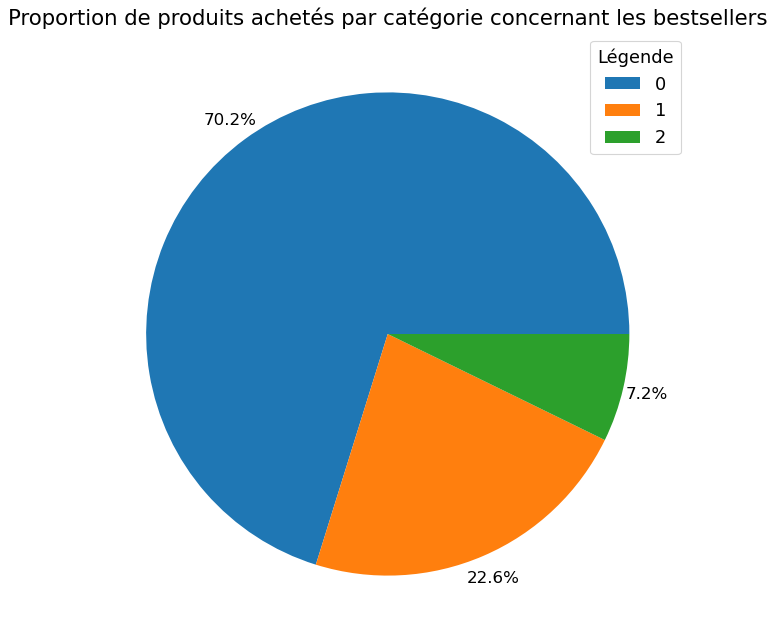

In [119]:
x = pr_camenbert["id_prod"]
plt.pie(x,autopct="%1.1f%%", pctdistance= 1.1, textprops={'fontsize': 15})
#axes.set_title('', size = 15)
plt.legend(pr_camenbert.index, title = "Légende") 
           #bbox_to_anchor=(-0.1, 0.65)) 
plt.title("Proportion de produits achetés par catégorie concernant les bestsellers")    
plt.show()

In [120]:
bestsellers.drop(columns = "Type")

,id_prod,nbr_vente,price,categ
0,1_369,2237,23.99,1
1,1_417,2173,20.99,1
2,1_414,2166,23.83,1
3,1_498,2117,23.37,1
4,1_425,2084,16.99,1
...,...,...,...,...
387,0_1531,563,6.99,0
388,0_1525,562,6.99,0
389,1_643,560,29.99,1
390,0_1528,560,11.38,0


## 4.4 Influence des bestsellers sur le CA

In [121]:
bestsellers_CA = bestsellers.apply(lambda row: row.nbr_vente * row.price, axis = 1)
bestsellers_CA



bestsellers_CA.sum()
print("Les bestsellers apportent",round(bestsellers_CA.sum()), 'd\'Euros.')
print("Soit",round(bestsellers_CA.sum()/CA_total,3)*100,'% du CA.')

Les bestsellers apportent 6243243 d'Euros.
Soit 54.1 % du CA.


## 4.5 Produits les moins achetés (en générale et par catéorie)

In [122]:
nbr_prod_plus_ach.sort_values(by="nbr_vente", ascending= True).head(20)

,id_prod,nbr_vente,price,categ,Type
3263,0_1633,1,24.99,0,
3244,0_833,1,2.99,0,
3245,0_1601,1,1.99,0,
3246,0_1533,1,27.99,0,
3247,0_1498,1,2.48,0,
3248,2_81,1,86.99,2,
3249,0_541,1,1.99,0,
3250,2_98,1,149.74,2,
3251,0_1683,1,2.99,0,
3252,0_1539,1,0.99,0,


In [123]:
# Nos floap
nbr_vente_floap = 2

floap =[]
for x in nbr_prod_plus_ach.nbr_vente:
	if (x<nbr_vente_floap):
		floap.append(x)
print('Nombre de produits les moins vendus:', len(floap))


nbr_prod_plus_ach[nbr_prod_plus_ach.nbr_vente < nbr_vente_floap]

Nombre de produits les moins vendus: 20


,id_prod,nbr_vente,price,categ,Type
3244,0_833,1,2.99,0,
3245,0_1601,1,1.99,0,
3246,0_1533,1,27.99,0,
3247,0_1498,1,2.48,0,
3248,2_81,1,86.99,2,
3249,0_541,1,1.99,0,
3250,2_98,1,149.74,2,
3251,0_1683,1,2.99,0,
3252,0_1539,1,0.99,0,
3253,0_1728,1,2.27,0,


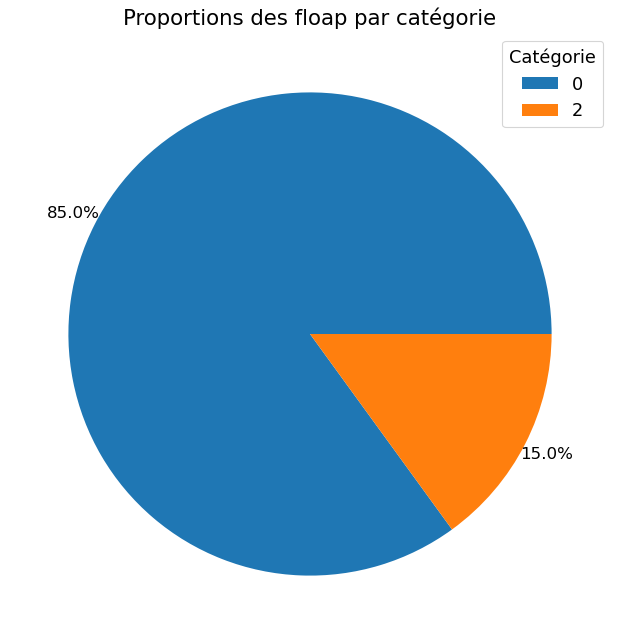

In [124]:
pr_pie = nbr_prod_plus_ach[nbr_prod_plus_ach.nbr_vente < nbr_vente_floap].groupby("categ")[["id_prod"]].count()

x = pr_pie["id_prod"]
plt.pie(x,autopct="%1.1f%%", pctdistance= 1.1, textprops={'fontsize': 15})
plt.legend(pr_pie.index, title="Catégorie")
plt.title("Proportions des floap par catégorie")

plt.show()

Les floaps se repartissement dans chaque catégorie de façons similaire aux bestsellers et au nombre de ventes par catégorie de façons générales.

## 4.6 Profil des clients

### 4.6.1 Fréquence d'achat (nombre de produits achetés chaque mois)

In [125]:
#df['date_sans_heure'] = df['date'].dt.date
#df['date_sans_heure']

In [126]:
df.groupby("id_client")[["date"]].count().sort_values(by="date", ascending=False).reset_index()
freq = df.groupby("id_client")[["id_session"]].count().sort_values(by="id_session", ascending=False).reset_index()
freq
# Une session, une transaction à aboutit à un achat par un client!

,id_client,id_session
0,c_1609,24472
1,c_6714,8903
2,c_3454,6635
3,c_4958,5090
4,c_3263,392
...,...,...
8593,c_4648,1
8594,c_1624,1
8595,c_4478,1
8596,c_240,1


In [127]:
# On crée des tranches
inter = [0,10,20,30,40,50,100,500,1000,10000,20000,30000]
# On crée la variable catégorielle "binned_session"
binned_session = pd.cut(freq["id_session"],bins = inter)
binned_session
#type(binned_session) # Series
binned_session.name # id_session
# On modifie le nom de la variable catégorielle "binned_session"
print("Ancien nom:", binned_session.name)
binned_session.name = "intervalle_nbr_session"
print("Nouveau nom:", binned_session.name)
# On crée la colonne "interval_nbr_session" dans la dataframe "test"
if freq.columns.nunique() == 2:
    freq = pd.concat([freq,binned_session], axis=1)

freq.sort_values(by="intervalle_nbr_session", ascending=False)

Ancien nom: id_session
Nouveau nom: intervalle_nbr_session


,id_client,id_session,intervalle_nbr_session
0,c_1609,24472,"(20000, 30000]"
2,c_3454,6635,"(1000, 10000]"
3,c_4958,5090,"(1000, 10000]"
1,c_6714,8903,"(1000, 10000]"
1286,c_7374,129,"(100, 500]"
...,...,...,...
8192,c_737,8,"(0, 10]"
8193,c_529,8,"(0, 10]"
8194,c_4776,8,"(0, 10]"
8195,c_410,8,"(0, 10]"


In [128]:
freq.groupby(["intervalle_nbr_session"])[["id_session"]].count()

,id_session
intervalle_nbr_session,
"(0, 10]",609
"(10, 20]",941
"(20, 30]",1017
"(30, 40]",957
"(40, 50]",820
"(50, 100]",2330
"(100, 500]",1920
"(500, 1000]",0
"(1000, 10000]",3


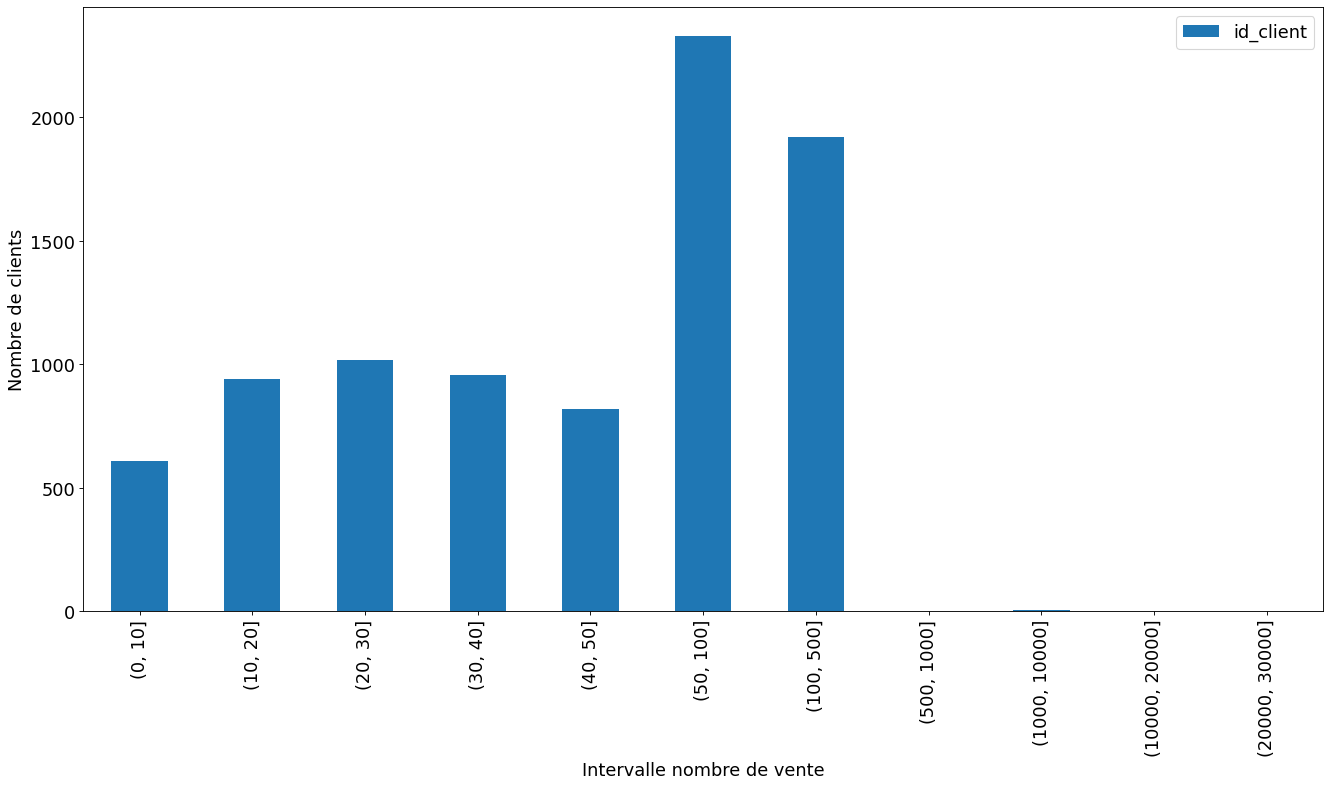

In [129]:
freq.groupby("intervalle_nbr_session")[["id_client"]].count().plot.bar(
    xlabel="Intervalle nombre de vente", 
    ylabel="Nombre de clients")


plt.show()

**Chaque date est associée à une et une seule transaction!**

On suppose que les id_client suivant: "c_1609", "c_6714", "c_3454" et "c_4958" correspondent à des professionnelle et non à des particulier, étant donné que le nombre de transaction est particulièrement élévé par rapport aux autres.

On décide d'analyser les clients professionnels et particuliers séparement.

In [130]:
choicelist = ['professionnel']

conditionlist = [df['id_client'].str.contains("c_1609|c_6714|c_3454 |c_4958") for c in choicelist]
conditionlist

df['type_client']= np.select(conditionlist, choicelist, default="particulier")  # objet
df['type_client']= df['type_client'].astype("string")
#df['type_client'].value_counts()[0:]
df['type_client']
df

,id_prod,price,categ,date,id_session,id_client,sex,birth,Year,Month,yyyy-mm,Day,type_client
633192,0_1259,11.99,0,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,2021,03,2021-03,01,particulier
273771,0_1390,19.37,0,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,2021,03,2021-03,01,particulier
55629,0_1352,4.50,0,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,2021,03,2021-03,01,particulier
209962,0_1458,6.55,0,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,2021,03,2021-03,01,particulier
293192,0_1358,16.49,0,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,2021,03,2021-03,01,particulier
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181209,1_508,21.92,1,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,2023,02,2023-02,28,particulier
269714,2_37,48.99,2,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,2023,02,2023-02,28,particulier
533169,1_695,26.99,1,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,2023,02,2023-02,28,particulier
254099,0_1547,8.99,0,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,2023,02,2023-02,28,particulier


In [131]:
# Nombre de vente par client chaque mois entre mars 2021 et février 2023.

df = df.rename(columns= {"yyyy-mm":"yyyy_mm"})

df_nbr_vente_mensuelle = df.groupby("id_client")\
                    .yyyy_mm.count()\
                    .reset_index()\
                    .rename(columns = {"yyyy_mm":"nbr_total_vente"})
df_nbr_vente_mensuelle
# J"ajoute la colonne "nbr_vente" à la dataframe. L'id_client sert de clé primaire.
CA_mensuel_part_vs_profi = pd.merge(df,df_nbr_vente_mensuelle, on="id_client", how="left")\
                                .sort_values(by="nbr_total_vente", ascending=False)\
                                .groupby(["type_client", "yyyy_mm"])[["price"]].sum()\
                                .rename(columns = {"price":"CA_mensuel"})\
                                .sort_values(by="yyyy_mm")

CA_mensuel_part_vs_profi = CA_mensuel_part_vs_profi.reset_index()
CA_mensuel_part_vs_profi

,type_client,yyyy_mm,CA_mensuel
0,particulier,2021-03,450522.17
1,professionnel,2021-03,32008.35
2,particulier,2021-04,443933.00
3,professionnel,2021-04,32316.16
4,particulier,2021-05,459578.20
...,...,...,...
41,particulier,2022-12,475554.95
42,professionnel,2023-01,30936.54
43,particulier,2023-01,486673.94
44,particulier,2023-02,426192.57


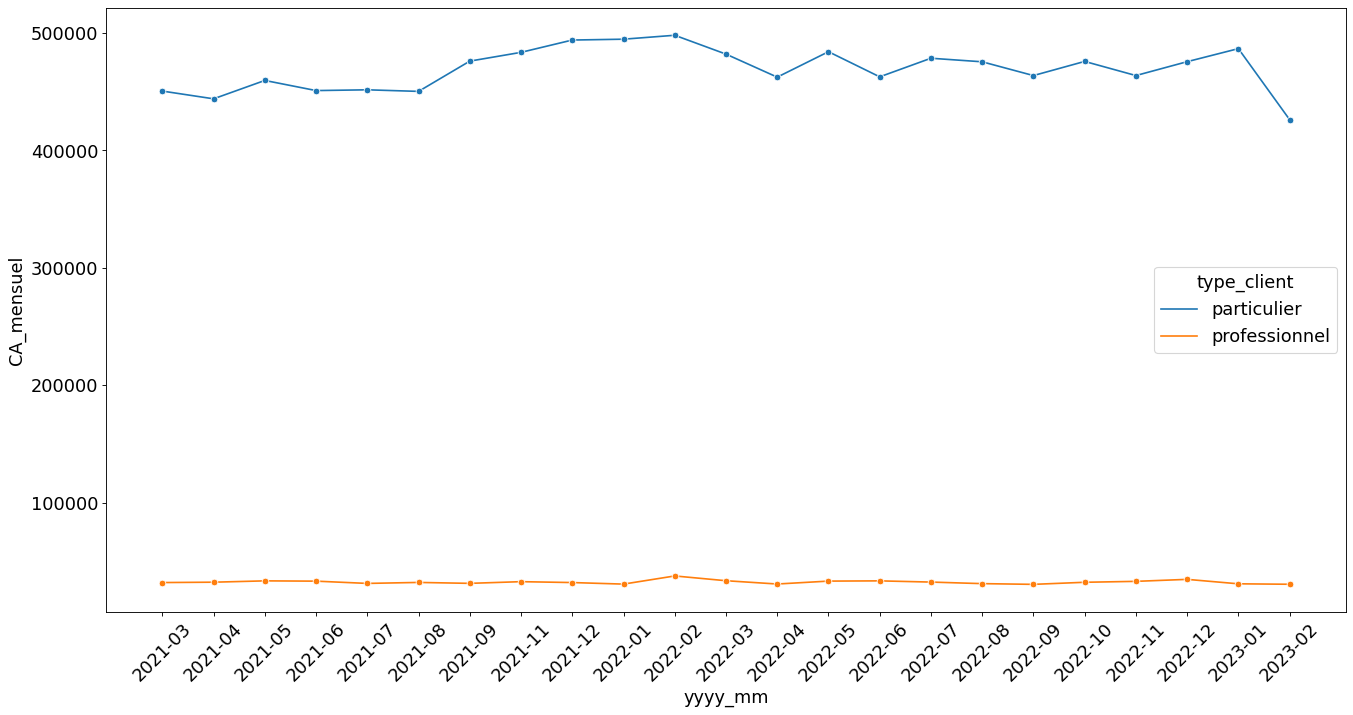

In [132]:
sns.lineplot(data =CA_mensuel_part_vs_profi, x= "yyyy_mm",y= "CA_mensuel", hue= "type_client", marker="o")
plt.xticks(rotation=45)
plt.show()

In [133]:
df_particulier = CA_mensuel_part_vs_profi[CA_mensuel_part_vs_profi["type_client"]=="particulier"]
df_particulier = df_particulier.set_index("yyyy_mm")
df_particulier 

,type_client,CA_mensuel
yyyy_mm,,
2021-03,particulier,450522.17
2021-04,particulier,443933.00
2021-05,particulier,459578.20
2021-06,particulier,450954.35
2021-07,particulier,451602.62
...,...,...
2022-10,particulier,475776.49
2022-11,particulier,463744.77
2022-12,particulier,475554.95


In [134]:
df_pro = CA_mensuel_part_vs_profi[CA_mensuel_part_vs_profi["type_client"]=="professionnel"]
df_pro = df_pro.set_index("yyyy_mm")
df_pro

,type_client,CA_mensuel
yyyy_mm,,
2021-03,professionnel,32008.35
2021-04,professionnel,32316.16
2021-05,professionnel,33445.19
2021-06,professionnel,33204.14
2021-07,professionnel,31272.74
...,...,...
2022-10,professionnel,32241.18
2022-11,professionnel,33030.06
2022-12,professionnel,34724.49


In [135]:
CA_mensuel_part_vs_profi_pour_pie = CA_mensuel_part_vs_profi.groupby("type_client")[["CA_mensuel"]].sum()
CA_mensuel_part_vs_profi_pour_pie

,CA_mensuel
type_client,
particulier,10789814.42
professionnel,745253.38


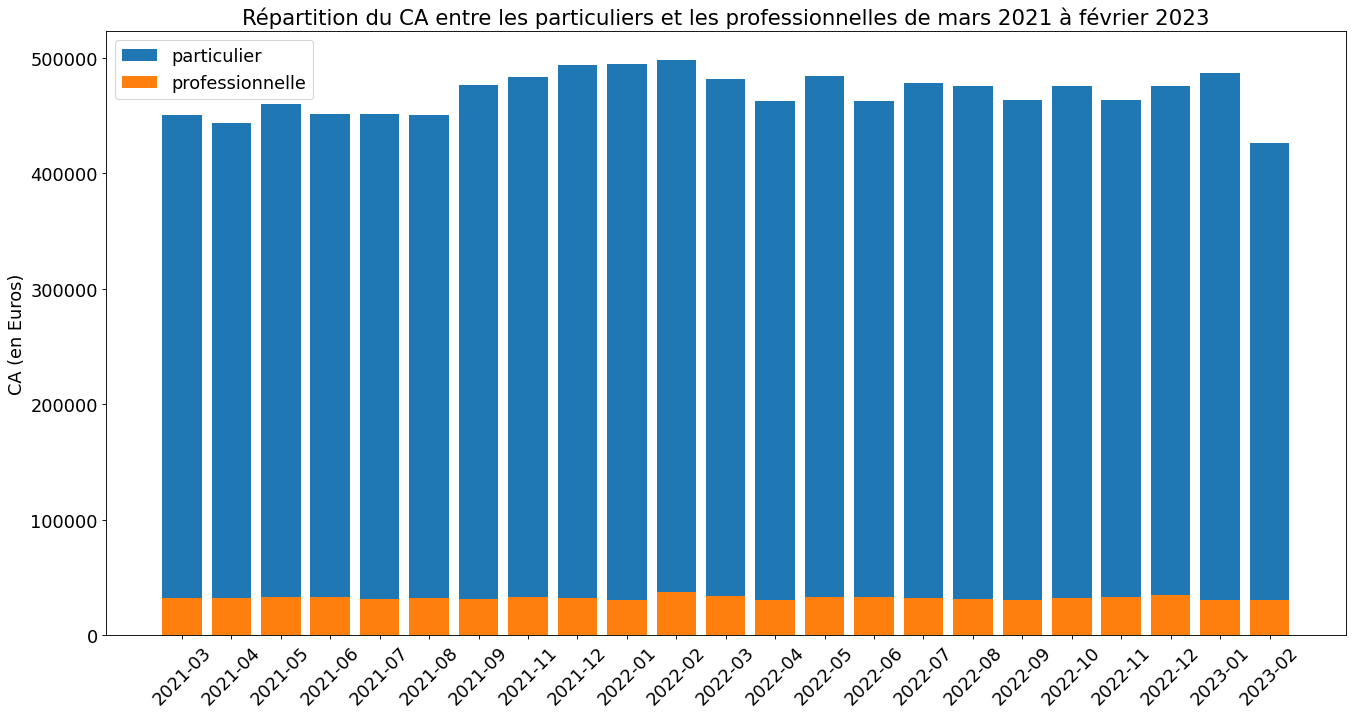

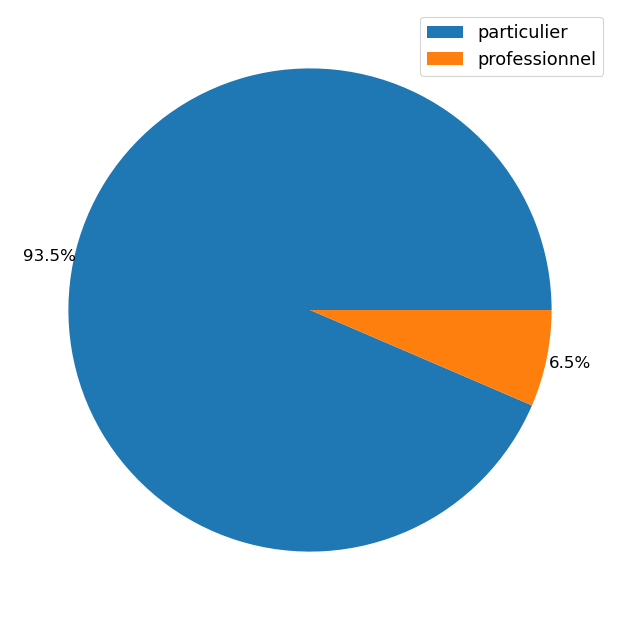

In [136]:
plt.bar(df_particulier.index,df_particulier.CA_mensuel)
plt.bar(df_pro.index,df_pro.CA_mensuel)
plt.xticks(rotation=45)
plt.ylabel("CA (en Euros)")
plt.legend(labels= ["particulier", "professionnelle"])
plt.title("Répartition du CA entre les particuliers et les professionnelles de mars 2021 à février 2023")

plt.show()


plt.pie(CA_mensuel_part_vs_profi_pour_pie.CA_mensuel, 
        autopct="%1.1f%%", pctdistance= 1.1, textprops={'fontsize': 15})
plt.legend(CA_mensuel_part_vs_profi_pour_pie.index)
plt.show()






In [137]:
CA_mensuel_part_vs_profi

,type_client,yyyy_mm,CA_mensuel
0,particulier,2021-03,450522.17
1,professionnel,2021-03,32008.35
2,particulier,2021-04,443933.00
3,professionnel,2021-04,32316.16
4,particulier,2021-05,459578.20
...,...,...,...
41,particulier,2022-12,475554.95
42,professionnel,2023-01,30936.54
43,particulier,2023-01,486673.94
44,particulier,2023-02,426192.57


### 4.6.2 Concentration du CA (Courbe de Lorenz et indice de Gini)

Nous regardons si le CA est reparti de manière régulière, tout d'abord parmi les particuliers et ensuite parmi les professionnels.

In [138]:
# Axe y: CA
# Axe x: Clients particulier



### 4.6.3 Concernant l'âge de nos clients dît particuliers

In [139]:
df["age_client"]= 2023 - df["birth"] #type: int
df


,id_prod,price,categ,date,id_session,id_client,sex,birth,Year,Month,yyyy_mm,Day,type_client,age_client
633192,0_1259,11.99,0,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,2021,03,2021-03,01,particulier,56
273771,0_1390,19.37,0,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,2021,03,2021-03,01,particulier,63
55629,0_1352,4.50,0,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,2021,03,2021-03,01,particulier,35
209962,0_1458,6.55,0,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,2021,03,2021-03,01,particulier,34
293192,0_1358,16.49,0,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,2021,03,2021-03,01,particulier,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181209,1_508,21.92,1,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,2023,02,2023-02,28,particulier,27
269714,2_37,48.99,2,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,2023,02,2023-02,28,particulier,29
533169,1_695,26.99,1,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,2023,02,2023-02,28,particulier,38
254099,0_1547,8.99,0,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,2023,02,2023-02,28,particulier,70


In [140]:
# Création de groupe d'âge
conditionlist = [
    (df["age_client"] < 15),
    (df["age_client"] > 15) & (df["age_client"] <= 24),
    (df["age_client"] > 24) & (df["age_client"] <= 64),
    (df["age_client"] > 64) 
    
]
choicelist = ["enfant","ado","adulte","aine"]
df["age_category"] = np.select(conditionlist,choicelist, default='?')
df

,id_prod,price,categ,date,id_session,id_client,sex,birth,Year,Month,yyyy_mm,Day,type_client,age_client,age_category
633192,0_1259,11.99,0,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,2021,03,2021-03,01,particulier,56,adulte
273771,0_1390,19.37,0,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,2021,03,2021-03,01,particulier,63,adulte
55629,0_1352,4.50,0,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,2021,03,2021-03,01,particulier,35,adulte
209962,0_1458,6.55,0,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,2021,03,2021-03,01,particulier,34,adulte
293192,0_1358,16.49,0,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,2021,03,2021-03,01,particulier,67,aine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181209,1_508,21.92,1,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,2023,02,2023-02,28,particulier,27,adulte
269714,2_37,48.99,2,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,2023,02,2023-02,28,particulier,29,adulte
533169,1_695,26.99,1,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,2023,02,2023-02,28,particulier,38,adulte
254099,0_1547,8.99,0,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,2023,02,2023-02,28,particulier,70,aine


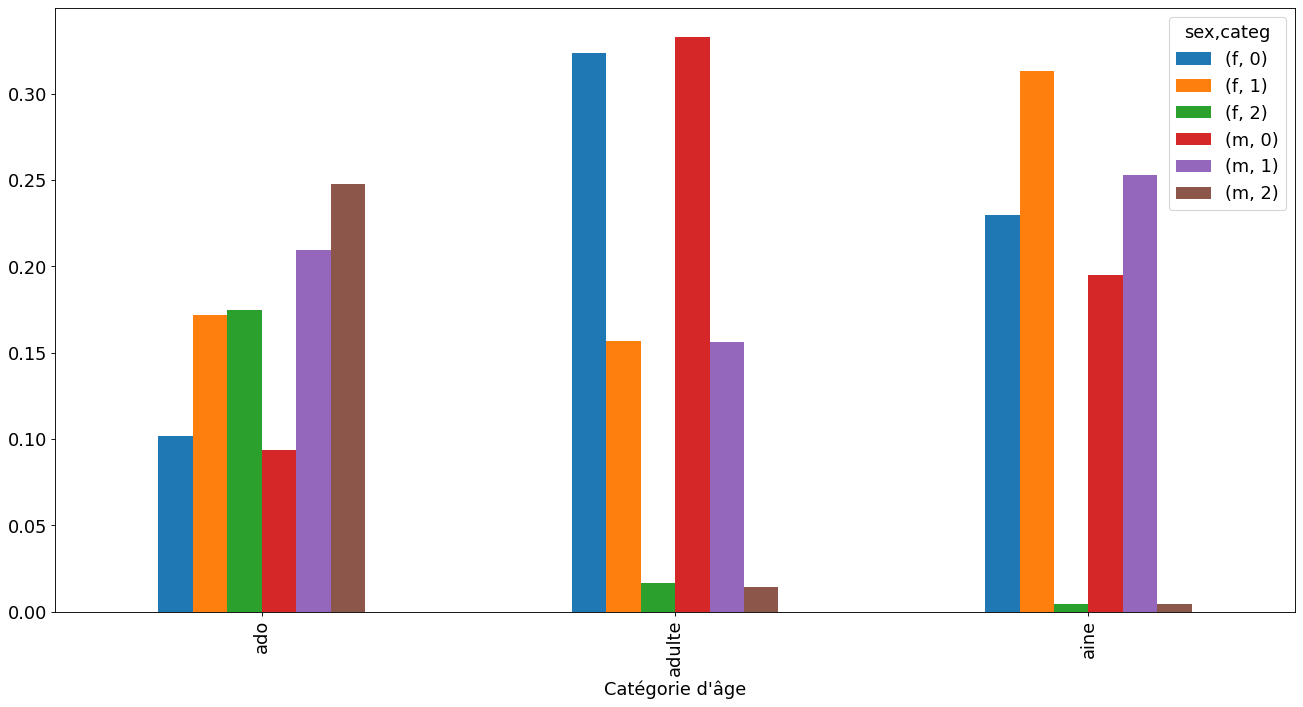

In [141]:
pd.crosstab(index = df["age_category"],
            columns = [df.sex,df.categ],
            normalize = 'index').plot.bar(xlabel = "Catégorie d'âge", ylabel="")
plt.show()